# Project: Market Segmentation
**Notebook 1: Problem Statement, Understanding Data and Preprocessing**

# INTRODUCTION

## PROBLEM STATEMENT

Insurance industry is overcrowded and competitive. Generally, customers can’t tell insurance companies apart and make decisions based on price alone. Hence, this causes insurance companies to disproportionately focus on price. As a result, insurance companies prioritize cost management, which reduces the quality of customer services and increases customer churn ([source](https://www.hyperon.io/blog/why-insurance-companies-need-customer-segmentation)).

In this project, I am tasked to develop a model that segregates customers so as to help insurance companies creating relevant offers that provide high-value experiences to customers that translates to increase in customer retention rates.

## BACKGROUND

Insurance industry is highly commoditized and customer engagement is both limited and superficial.  Insurance companies have difficulty building a strong relationship with customers and maintaining customer engagement outside a claim or a renewal. For insurance companies to provide a superior customer experience that translates to customer retention, insurance companies must fully understand who their customers are, such as what motivates them, what concerns them, their hopes, their expectations and their life situations. 

Market segmentation will help insurance companies to improve customer experience and increase customer retention rates. By applying market segmentation strategy, all customers are divided into smaller sub-groups with one or more similar characteristics. This strategy helps insurance companies in <br>
(1) identifying specific marketable segments, allowing insurance companies to use different strategies to push renewals and upsells; <br>
(2) discovering untapped and profitable customer segments; and <br>
(3) identifying market trends that are not obvious and find ways of effectively meeting demand ([source](https://www.hyperon.io/blog/why-insurance-companies-need-customer-segmentation)). <br>

With market segmentation, insurance companies will be able to avoid head on competition in the market place by differentiating their offerings, not only on the basis of price but also through styling, packaging, promotional appeal, method of distribution and superior service ([source](https://nairaproject.com/projects/2110.html)). This in turn translates to high-value experiences and customer loyalty with satisfied customers remaining longer, renewing at higher prices, and recommending businesses to friends and family. 

## Dataset

Dataset, which is provided by Prudential Life Insurance U.S.A, is obtained from [Kaggle](https://www.kaggle.com/competitions/prudential-life-insurance-assessment/data). 

There are 3 types of variables: <br> 
(1) categorical; <br>
(2) continuous; and <br>
(3) discrete

in this dataset. All variables' data types and descriptions are below.

In [1]:
%%html
<style>
table {float:left}
</style>

| Data Type | Variable
|:---|:---
|Categorical|`Product_Info_1`, `Product_Info_2`, `Product_Info_3`, `Product_Info_5`, `Product_Info_6`, `Product_Info_7`, `Employment_Info_2`, `Employment_Info_3`, `Employment_Info_5`, `InsuredInfo_1`, `InsuredInfo_2`, `InsuredInfo_3`, `InsuredInfo_4`, `InsuredInfo_5`, `InsuredInfo_6`, `InsuredInfo_7`, `Insurance_History_1`, `Insurance_History_2`, `Insurance_History_3`, `Insurance_History_4`, `Insurance_History_7`, `Insurance_History_8`, `Insurance_History_9`, `Family_Hist_1`, `Medical_History_2`, `Medical_History_3`, `Medical_History_4`, `Medical_History_5`, `Medical_History_6`, `Medical_History_7`, `Medical_History_8`, `Medical_History_9`, `Medical_History_11`, `Medical_History_12`, `Medical_History_13`, `Medical_History_14`, `Medical_History_16`, `Medical_History_17`, `Medical_History_18`, `Medical_History_19`, `Medical_History_20`, `Medical_History_21`, `Medical_History_22`, `Medical_History_23`, `Medical_History_25`, `Medical_History_26`, `Medical_History_27`, `Medical_History_28`, `Medical_History_29`, `Medical_History_30`, `Medical_History_31`, `Medical_History_33`, `Medical_History_34`, `Medical_History_35`, `Medical_History_36`, `Medical_History_37`, `Medical_History_38`, `Medical_History_39`, `Medical_History_40`, `Medical_History_41`
|Continuous|`Product_Info_4`, `Ins_Age`, `Ht`, `Wt`, `BMI`, `Employment_Info_1`, `Employment_Info_4`, `Employment_Info_6`, `Insurance_History_5`, `Family_Hist_2`, `Family_Hist_3`, `Family_Hist_4`, `Family_Hist_5`
|Discrete|`Medical_History_1`, `Medical_History_10`, `Medical_History_15`, `Medical_History_24`, `Medical_History_32`, `Medical_Keyword_1-48`

**Data Fields**

| Variable | Description 
|:---|:---
| `Id` | A unique identifier associated with an application.
| `Product_Info_1-7` | A set of normalized variables relating to the product applied for
| `Ins_Age` | Normalized age of applicant
| `Ht` | Normalized height of applicant
| `Wt` | Normalized weight of applicant
| `BMI` | Normalized BMI of applicant
| `Employment_Info_1-6` | A set of normalized variables relating to the employment history of the applicant.
| `InsuredInfo_1-6` | A set of normalized variables providing information about the applicant.
| `Insurance_History_1-9` | A set of normalized variables relating to the insurance history of the applicant.
| `Family_Hist_1-5` | A set of normalized variables relating to the family history of the applicant.
| `Medical_History_1-41` | A set of normalized variables relating to the medical history of the applicant.
| `Medical_Keyword_1-48` | A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
| `Response` | This is the target variable, an ordinal variable relating to the final decision associated with an application

## TABLE OF CONTENTS

[(1) Understanding Data](#1.-Understanding-Data) <br>
[(2) Preprocessing](#2.-Preprocessing) <br>

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
import plotnine
import numpy as np
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

In [3]:
# Show All Rows in Dataset
pd.set_option('display.max_rows', None)

# Show All Column in Dataset
pd.set_option('display.max_columns', None)

### Import Data

In [4]:
# Read data from csv.
train_dataframe = pd.read_csv("./datasets/train.csv")

# 1. Understanding Data

[(1) Data Overview](#Data-Overview) <br>
[(2) Check for Missing Values](#Check-for-Missing-Values) <br>
[(3) Check for Duplicate Values](#Check-for-Duplicate-Values)<br>
[(4) Check for Unique Values](#Check-for-Unique-Values)<br>
[(5) Check for Outliers](#Check-for-Outliers)<br>
[(6) Check for Multicollinearity](#Check-for-Multicollinearity)<br>

### Data Overview

In [5]:
# Summary of dataFrame.
print("***************************************")
print("     Summary of Insurance Dataframe    ")
print("***************************************")
train_dataframe.info()

***************************************
     Summary of Insurance Dataframe    
***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


**Observation**:
- There are 128 columns/features and 59,380 rows in this dataframe.
- There are 127 columns/features with numerical data (109 columns/features with int64 data type; and 18 columns/features with float64 data type) and 1 column/feature with categorical data.

In [6]:
# Print shape of dataframe.
print(f"Shape:", train_dataframe.shape)

Shape: (59381, 128)


In [7]:
# Displays first 5 rows of dataframe.
train_dataframe.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt       BMI  Employment_Info_1  Employment_Info_2  \
0  0.148536  0.323008              0.028                 12   
1  0.131799  0.272288              0.000                  1   
2  0.288703  0.428780              0.030                  9   
3  0.205021  0.352438              0.042                  9   
4  0.234310  0.424046              0.027                  9   

   Employment_Info_3  Employment_Info_4  Employment_Info_5  Employment_Info_6  \
0                  1                0.0                  3                NaN   
1                  3                0.0                  2             0.0018   
2                  1                0.0                  2             0.0300   
3                  1                0.0                  3             0.2000   
4                  1                0.0                  2             0.0500   

   InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
0              1              2              6              3              1   
1              1              2              6              3              1   
2              1              2              8              3              1   
3              2              2              8              3              1   
4              1              2              6              3              1   

   InsuredInfo_6  InsuredInfo_7  Insurance_History_1  Insurance_History_2  \
0              2              1                    1                    1   
1              2              1                    2                    1   
2              1              1                    2                    1   
3              2              1                    2                    1   
4              2              1                    2                    1   

   Insurance_History_3  Insurance_History_4  Insurance_History_5  \
0                    3                    1             0.000667   
1                    3                    1             0.000133   
2                    1                    3                  NaN   
3                    1                    3                  NaN   
4                    1                    3                  NaN   

   Insurance_History_7  Insurance_History_8  Insurance_History_9  \
0                    1                    1                    2   
1                    1                    3                    2   
2                    3                    2                    3   
3                    3                    2                    3   
4                    3                    2                    3   

   Family_Hist_1  Family_Hist_2  Family_Hist_3  Family_Hist_4  Family_Hist_5  \
0              2            NaN       0.598039            NaN       0.526786   
1              2       0.188406            NaN       0.084507            NaN   
2              3       0.304348            NaN       0.225352            NaN   
3              3       0.420290            NaN       0.352113            NaN   
4              2       0.463768            NaN       0.408451            NaN   

   Medical_History_1  

In [8]:
# Displays last 5 rows of dataframe.
train_dataframe.tail()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
59376  79142               1             D1              10        0.230769   
59377  79143               1             D3              26        0.230769   
59378  79144               1             E1              26        0.076923   
59379  79145               1             D2              10        0.230769   
59380  79146               1             A8              26        0.076923   

       Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
59376               2               3               1  0.074627  0.709091   
59377               2               3               1  0.432836  0.800000   
59378               2               3               1  0.104478  0.745455   
59379               2               3               1  0.507463  0.690909   
59380               2               3               1  0.447761  0.781818   

             Wt       BMI  Employment_Info_1  Employment_Info_2  \
59376  0.320084  0.519103              0.020                  1   
59377  0.403766  0.551119              0.100                  9   
59378  0.246862  0.360969              0.035                  9   
59379  0.276151  0.462452              0.038                  9   
59380  0.382845  0.539563              0.123                  9   

       Employment_Info_3  Employment_Info_4  Employment_Info_5  \
59376                  3            0.00000                  3   
59377                  1            0.00001                  2   
59378                  1            0.00000                  2   
59379                  1                NaN                  3   
59380                  1                NaN                  2   

       Employment_Info_6  InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  \
59376              0.025              1              2              8   
59377              0.350              1              2              3   
59378                NaN              1              2              6   
59379                NaN              1              2              3   
59380              0.300              1              2              6   

       InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  InsuredInfo_7  \
59376              3              1              2              1   
59377              3              1              1              1   
59378              3              1              1              1   
59379              3              1              2              1   
59380              3              1              1              1   

       Insurance_History_1  Insurance_History_2  Insurance_History_3  \
59376                    2                    1                    1   
59377                    2                    1                    3   
59378                    2                    1                    1   
59379                    2                    1                    1   
59380                    2                    1                    1   

       Insurance_History_4  Insurance_History_5  Insurance_History_7  \
59376                    3                  NaN                    3   
59377                    2             0.000267                    1   
59378                    3                  NaN                    3   
59379                    3                  NaN                    3   
59380                    3                  NaN                    3   

       Insurance_History_8  Insurance_History_9  Family_Hist_1  Family_Hist_2  \
59376                    2                    3              3       0.217391   
59377                    3                    2              3       0.565217   
59378                    2                    3              3       0.173913   
59379                    2                    3              2            NaN   
59380                    2                    3              2            NaN   

       Family_Hist_3  Family_Hist_4  Family_Hist_5  Medical_Histo

In [9]:
# Displays summary of dataframe statistics.
train_dataframe.describe().T

count          mean           std  min           25%  \
Id                   59381.0  39507.211515  22815.883089  2.0  19780.000000   
Product_Info_1       59381.0      1.026355      0.160191  1.0      1.000000   
Product_Info_3       59381.0     24.415655      5.072885  1.0     26.000000   
Product_Info_4       59381.0      0.328952      0.282562  0.0      0.076923   
Product_Info_5       59381.0      2.006955      0.083107  2.0      2.000000   
Product_Info_6       59381.0      2.673599      0.739103  1.0      3.000000   
Product_Info_7       59381.0      1.043583      0.291949  1.0      1.000000   
Ins_Age              59381.0      0.405567      0.197190  0.0      0.238806   
Ht                   59381.0      0.707283      0.074239  0.0      0.654545   
Wt                   59381.0      0.292587      0.089037  0.0      0.225941   
BMI                  59381.0      0.469462      0.122213  0.0      0.385517   
Employment_Info_1    59362.0      0.077582      0.082347  0.0      0.035000   
Employment_Info_2    59381.0      8.641821      4.227082  1.0      9.000000   
Employment_Info_3    59381.0      1.300904      0.715034  1.0      1.000000   
Employment_Info_4    52602.0      0.006283      0.032816  0.0      0.000000   
Employment_Info_5    59381.0      2.142958      0.350033  2.0      2.000000   
Employment_Info_6    48527.0      0.361469      0.349551  0.0      0.060000   
InsuredInfo_1        59381.0      1.209326      0.417939  1.0      1.000000   
InsuredInfo_2        59381.0      2.007427      0.085858  2.0      2.000000   
InsuredInfo_3        59381.0      5.835840      2.674536  1.0      3.000000   
InsuredInfo_4        59381.0      2.883666      0.320627  2.0      3.000000   
InsuredInfo_5        59381.0      1.027180      0.231566  1.0      1.000000   
InsuredInfo_6        59381.0      1.409188      0.491688  1.0      1.000000   
InsuredInfo_7        59381.0      1.038531      0.274915  1.0      1.000000   
Insurance_History_1  59381.0      1.727606      0.445195  1.0      1.000000   
Insurance_History_2  59381.0      1.055792      0.329328  1.0      1.000000   
Insurance_History_3  59381.0      2.146983      0.989139  1.0      1.000000   
Insurance_History_4  59381.0      1.958707      0.945739  1.0      1.000000   
Insurance_History_5  33985.0      0.001733      0.007338  0.0      0.000400   
Insurance_History_7  59381.0      1.901989      0.971223  1.0      1.000000   
Insurance_History_8  59381.0      2.048484      0.755149  1.0      1.000000   
Insurance_History_9  59381.0      2.419360      0.509577  1.0      2.000000   
Family_Hist_1        59381.0      2.686230      0.483159  1.0      2.000000   
Family_Hist_2        30725.0      0.474550      0.154959  0.0      0.362319   
Family_Hist_3        25140.0      0.497737      0.140187  0.0      0.401961   
Family_Hist_4        40197.0      0.444890      0.163012  0.0      0.323944   
Family_Hist_5        17570.0      0.484635      0.129200  0.0      0.401786   
Medical_History_1    50492.0      7.962172     13.027697  0.0      2.000000   
Medical_History_2    59381.0    253.987100    178.621154  1.0    112.000000   
Medical_History_3    59381.0      2.102171      0.303098  1.0      2.000000   
Medical_History_4    59381.0      1.654873      0.475414  1.0      1.000000   
Medical_History_5    59381.0      1.007359      0.085864  1.0      1.000000   
Medical_History_6    59381.0      2.889897      0.456128  1.0      3.000000   
Medical_History_7    59381.0      2.012277      0.172360  1.0      2.000000   
Medical_History_8    59381.0      2.044088      0.291353  1.0      2.000000   
Medical_History_9    59381.0      1.769943      0.421032  1.0      2.000000   
Medical_History_10     557.0    141.118492    107.759559  0.0      8.000000   
Medical_History_11   59381.0      2.993836      0.095340  1.0      3.000000   
Medical_History_12   59381.0      2.056601      0.231153  1.0      2.000000   
Medical_History_13   59381.0      2.768141      0.640259  1.0      3.0000

**Observation**:
- `Employment_Info_2`, `Medical_History_24`, `Medical_History_32` maximum values are at least 3 time higher than its 75th percentile. <Br>

This will be investigated later to check for outlier.

### Check for Missing Values

In [10]:
# Check missing value
train_missing_values = train_dataframe.isna().sum().sort_values(ascending = False)
train_missing_values = train_missing_values.to_frame()
train_missing_values = train_missing_values.rename(columns={0: 'Number_of_Missing_Values'})

# loop through each row of column Number_of_Missing_Values to create new column Percentage_of_Missing_Values.
for index, row in train_missing_values.iterrows():
    train_missing_values.at[index, "Percentage_of_Missing_Values"] = '{:.2%}'.format(row['Number_of_Missing_Values'] / train_dataframe.shape[0])
train_missing_values

Number_of_Missing_Values Percentage_of_Missing_Values
Medical_History_10                      58824                       99.06%
Medical_History_32                      58274                       98.14%
Medical_History_24                      55580                       93.60%
Medical_History_15                      44596                       75.10%
Family_Hist_5                           41811                       70.41%
Family_Hist_3                           34241                       57.66%
Family_Hist_2                           28656                       48.26%
Insurance_History_5                     25396                       42.77%
Family_Hist_4                           19184                       32.31%
Employment_Info_6                       10854                       18.28%
Medical_History_1                        8889                       14.97%
Employment_Info_4                        6779                       11.42%
Employment_Info_1                          19                        0.03%
Medical_Keyword_13                          0                        0.00%
Medical_Keyword_14                          0                        0.00%
Medical_Keyword_7                           0                        0.00%
Medical_Keyword_46                          0                        0.00%
Medical_Keyword_15                          0                        0.00%
Medical_Keyword_12                          0                        0.00%
Medical_Keyword_11                          0                        0.00%
Medical_Keyword_10                          0                        0.00%
Medical_Keyword_16                          0                        0.00%
Medical_Keyword_9                           0                        0.00%
Medical_Keyword_47                          0                        0.00%
Medical_Keyword_8                           0                        0.00%
Medical_Keyword_5                           0                        0.00%
Medical_Keyword_6                           0                        0.00%
Medical_Keyword_18                          0                        0.00%
Medical_Keyword_4                           0                        0.00%
Medical_Keyword_3                           0                        0.00%
Medical_Keyword_2                           0                        0.00%
Medical_Keyword_1                           0                        0.00%
Medical_Keyword_48                          0                        0.00%
Medical_History_41                          0                        0.00%
Medical_History_40                          0                        0.00%
Medical_History_39                          0                        0.00%
Medical_History_38                          0                        0.00%
Medical_History_37                          0                        0.00%
Medical_History_36                          0                        0.00%
Medical_History_35                          0                        0.00%
Medical_Keyword_17                          0                        0.00%
Medical_Keyword_44                          0                        0.00%
Medical_Keyword_19                          0                        0.00%
Medical_Keyword_20                          0                        0.00%
Medical_Keyword_42                          0                        0.00%
Medical_Keyword_41                          0                        0.00%
Medical_Keyword_40                          0                        0.00%
Medical_Keyword_39                          0                        0.00%
Medical_Keyword_38                          0                        0.00%
Medical_Keyword_37                          0                        0.00%
Medical_Keyword_36                          0                        0.00%
Medical_Keyword_35                          0                        0.00%
Medical_Keyword_34                          0 

**Observation**:
- In total, there are 12 features: `Medical_History_10`, `Medical_History_32`, `Medical_History_24`, `Medical_History_15`, `Family_Hist_5`, `Family_Hist_3`, `Family_Hist_2`, `Insurance_History_5`, `Family_Hist_4`, `Employment_Info_6`, `Medical_History_1` and `Employment_Info_4`;  with more than 10% of missing values.

### Check for Duplicate Values

In [11]:
# Find duplicate rows across all columns.
duplicate_rows = train_dataframe[train_dataframe.duplicated()]

print("Observation:")

# Check if there is duplicate record and print respective message accordingly.
if duplicate_rows.empty:
    print("There is no record with duplicate value.")
else:
    print("There is record with duplicate value.")

Observation:
There is no record with duplicate value.


### Check for Unique Values

In [12]:
# Store columns with object as data type and then sort the columns in ascending order.
object_columns = train_dataframe.select_dtypes(include=["object"]).columns.sort_values()

# Convert to list.
object_columns = list(object_columns)

# Check number of unique values in each column of object_columns list.
print("*****************************************************")
for column_index in range(len(object_columns)):
    unique_value = train_dataframe[object_columns[column_index]].unique()
    print(f"Number of unique values in column {object_columns[column_index]}:", len(unique_value), "\n")
    unique_value = pd.DataFrame(unique_value, columns = [object_columns[column_index]])
    print(unique_value, "\n")
    print("*****************************************************")

*****************************************************
Number of unique values in column Product_Info_2: 19 

   Product_Info_2
0              D3
1              A1
2              E1
3              D4
4              D2
5              A8
6              A2
7              D1
8              A7
9              A6
10             A3
11             A5
12             C4
13             C1
14             B2
15             C3
16             C2
17             A4
18             B1 

*****************************************************


In [13]:
# Check, sort and export number of unique values present in each column of the dataframe to csv file.
count_of_unique_values = train_dataframe.nunique().sort_values(ascending = False).to_csv("./datasets/count_of_unique_values.csv", index = True)

Histogram below was created using Tableau with data from count_of_unique_values csv file.

![image.png](./images/numerical_features_unique_values_count.png)

**Observations**:
- Categorical feature `Product_Info_2` has 19 unique values.
- In all numerical features, `Id` has highest unique values at 59,381.
- `Id`, `BMI`, `Insurance_History_5`, `Employment_Info_1`, `Product_Info_4`, `Employment_Info_6`, `Employment_Info_4`, `Medical_History_2`, `Wt` and `Medical_History_15` are top 10 numerical features by count of unique values.

### Check for Outliers

In [14]:
# Function to create boxplot and histogram.
def boxplot_histplot(dataframe, number_of_rows, number_of_columns, data_type):

    # Create a list to store object type.
    data_type_list = data_type
    
    # Create an object to store numerical columns.
    all_columns = dataframe.select_dtypes(include= data_type_list).columns

    # Set figure-level attributes as (15, 200) with width = 15 and height = 200.
    fig, ax = plt.subplots(number_of_rows, number_of_columns, figsize = (15, 200))

    # Loop through all numerical columns.
    for column_index in range(len(all_columns)):
        
        # Draw box plot.
        sns.boxplot(data = dataframe, x = all_columns[column_index], ax = ax[column_index, 0], color='skyblue')
        
        # Draw histogram.
        sns.histplot(dataframe[all_columns[column_index]], ax = ax[column_index,1], color='skyblue')
    
    # Tight_layout automatically adjusts subplot params so that the subplots fit in to the figure area. 
    plt.tight_layout()

**Numerical Features**

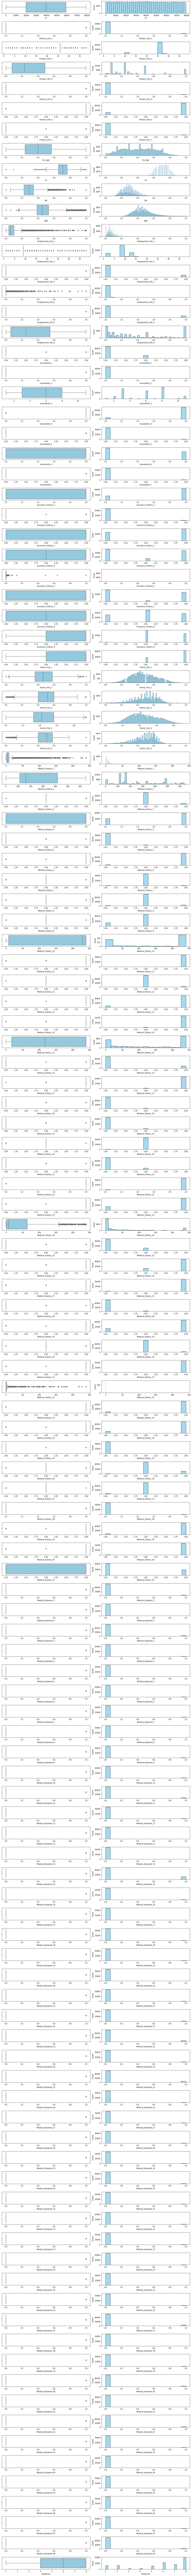

In [15]:
# Draw box plot and histogram for all numerical columns.
boxplot_histplot(dataframe = train_dataframe, number_of_rows = 127, number_of_columns = 2, data_type = ["float64", "int64"])

**Observations**:
- `Id` data is very close to uniform distribution. This suggests that issuance of `Id` is quite evenly spread across numbers that range from 0 and close to 80000.
- `Product_Info_1`, `Product_Info_4`, `Product_Info_5` and `Product_Info_7` data are skewed to the right.
   - Majority data relating to the product applied for `Product_Info_1`, `Product_Info_5` and `Product_Info_7` are 1.0, 2.0 and 1.00 respectively.
   - `Product_Info_4` has 4 peaks. This suggests that there are 4 grouping in this feature.
- `Product_Info_3` and `Product_Info_6` data are skewed to the left with at least 2 peaks. This suggests that there are at least 2 grouping in these 2 features.
- `Ins_Age` data is skewed to the right. This suggests that normalized age of applicant with most occurence is lower than average normalized age of applicant.  
- `Ht` data is skewed to the left. This suggests that normalized height of applicant with most occurence is higher than average normalized height of applicant.
- `Wt` data is skewed to the right. This suggests that normalized weight of applicant with most occurence is lower than average normalized weight of applicant.
- `BMI` data is skewed to the right. This suggests that normalized BMI of applicant with most occurence is lower than average normalized BMI of applicant.
- `Employment_Info_1`, `Employment_Info_2`, `Employment_Info_3`, `Employment_Info_4`, `Employment_Info_5` and `Employment_Info_6` data are skewed to the right.
   - `Employment_Info_1` has multiple peaks. This suggests that there are multiple grouping in this feature.
   - `Employment_Info_2` data skewed to the right with at least 3 peaks. This suggests that there are at least 3 grouping in this feature.
   - `Employment_Info_3` and `Employment_Info_5` have 2 peaks. This suggests that there are 2 grouping in these 2 features.
   - `Employment_Info_6` has at least 3 peaks. This suggests that there are at least 3 grouping in this feature.
- `InsuredInfo_1`, `InsuredInfo_2`, `InsuredInfo_5`, `InsuredInfo_6` and `InsuredInfo_7` data skewed to the right.
   - `InsuredInfo_1` and `InsuredInfo_6` have 2 peaks. This suggests that there are 2 grouping in these 2 features.
- `InsuredInfo_3` and `InsuredInfo_4` data are skewed to the left.
   - `InsuredInfo_3` has 3 peaks. This suggests that there are 3 grouping in this feature.
   - `InsuredInfo_4` has 2 peaks. This suggests that there are 2 grouping in this feature.
- `Insurance_History_1`, `Insurance_History_3` and `Insurance_History_9` data are skewed to the left with at least 2 peaks. This suggests that there are 2 grouping in these  features and normalized variables relating to the insurance history of the applicant with most occurence is higher than average normalized variables relating to the insurance history of the applicant.
- `Insurance_History_2` and `Insurance_History_4` data are skewed to the right with at least 2 peaks. This suggests that there are at least 2 grouping in these 2 features and normalized variables relating to the insurance history of the applicant with most occurence is lower than average normalized variables relating to the insurance history of the applicant.
- `Family_Hist_1`, `Family_Hist_3` and `Family_Hist_5` data are skewed to the left. This suggests that normalized variables relating to the family history of the applicant with most occurence is higher than average normalized variables relating to the family history of the applicant.
- `Family_Hist_2` and `Family_Hist_4` data are skewed to the right. This suggests that normalized variables relating to the family history of the applicant with most occurence is lower than average normalized variables relating to the family history of the applicant.
- `Medical_History_1`, `Medical_History_2`, `Medical_History_5`, `Medical_History_16`, `Medical_History_18`, `Medical_History_19`, `Medical_History_21`, `Medical_History_24`, `Medical_History_25`, `Medical_History_28`, `Medical_History_35`, `Medical_History_38`, `Medical_History_41` data are skewed to the right and normalized variables relating to the medical history of the applicant with most occurence is lower than average normalized variables relating to the medical history of the applicant.
- `Medical_History_4`, `Medical_History_10`, `Medical_History_11`, `Medical_History_13`, `Medical_History_15`, `Medical_History_17`, `Medical_History_22`, `Medical_History_23`, `Medical_History_26`, `Medical_History_27`, `Medical_History_29`, `Medical_History_31`, `Medical_History_33`, `Medical_History_34`, `Medical_History_39`, `Medical_History_40` data are skewed to the left. This suggests that there are 2 grouping in these features and normalized variables relating to the medical history of the applicant with most occurence is higher than average normalized variables relating to the medical history of the applicant.
- `Medical_Keyword_1`, `Medical_Keyword_2`, `Medical_Keyword_3`, `Medical_Keyword_4`, `Medical_Keyword_5`, `Medical_Keyword_6`, `Medical_Keyword_7`, `Medical_Keyword_8`, 
`Medical_Keyword_9`, `Medical_Keyword_10`, `Medical_Keyword_11`, `Medical_Keyword_12`, `Medical_Keyword_13`, `Medical_Keyword_14`, `Medical_Keyword_15`, `Medical_Keyword_16`, `Medical_Keyword_17`, `Medical_Keyword_18`, `Medical_Keyword_19`, `Medical_Keyword_20`, `Medical_Keyword_21`, `Medical_Keyword_22`, `Medical_Keyword_23`, `Medical_Keyword_24`, `Medical_Keyword_25`, `Medical_Keyword_26`, `Medical_Keyword_27`, `Medical_Keyword_28`, `Medical_Keyword_29`, `Medical_Keyword_30`, `Medical_Keyword_31`, `Medical_Keyword_32`, `Medical_Keyword_33`, `Medical_Keyword_34`, `Medical_Keyword_35`, `Medical_Keyword_36`, `Medical_Keyword_37`, `Medical_Keyword_38`, `Medical_Keyword_39`, `Medical_Keyword_40`, `Medical_Keyword_41`, `Medical_Keyword_42`, `Medical_Keyword_43`, `Medical_Keyword_44`, `Medical_Keyword_45`, `Medical_Keyword_46`, `Medical_Keyword_47` and `Medical_Keyword_48` data are skewed to the right with 0 as the majority of medical keywords being associated with the application.
- `Response` data is skewed to the left with majority giving responses ranging from 4 to 8 and minority giving responses ranging from 1 to 3.
- `Product_Info_1`, `Product_Info_3`, `Product_Info_5`, `Product_Info_6`, `Product_Info_7`, `Ht`, `Wt`, `BMI`, `Employment_Info_1`, `Employment_Info_2`, `Employment_Info_3`, `Employment_Info_4`, `Employment_Info_5`, `InsuredInfo_1`, `InsuredInfo_2`, `InsuredInfo_4`, `InsuredInfo_5`, `InsuredInfo_7`, `Insurance_History_2`, `Insurance_History_5`, `Family_Hist_2`, `Family_Hist_3`, `Family_Hist_4`, `Family_Hist_5`, `Medical_History_1`, `Medical_History_3`, `Medical_History_5`, `Medical_History_6`, `Medical_History_7`, `Medical_History_8`, `Medical_History_9`, `Medical_History_11`, `Medical_History_12`, `Medical_History_13`, `Medical_History_14`, `Medical_History_16`, `Medical_History_17`, `Medical_History_18`, `Medical_History_19`, `Medical_History_20`, `Medical_History_21`, `Medical_History_22`, `Medical_History_23`, `Medical_History_24`, `Medical_History_25`, `Medical_History_26`, `Medical_History_27`, `Medical_History_28`, `Medical_History_29`, `Medical_History_30`, `Medical_History_31`, `Medical_History_32`, `Medical_History_33`, `Medical_History_34`, `Medical_History_35`, `Medical_History_36`, `Medical_History_37`, `Medical_History_38`, `Medical_History_39`, `Medical_History_40`, `Medical_Keyword_1`, `Medical_Keyword_2`, `Medical_Keyword_3`, `Medical_Keyword_4`, `Medical_Keyword_5`, `Medical_Keyword_6`, `Medical_Keyword_7`, `Medical_Keyword_8`, `Medical_Keyword_9`, `Medical_Keyword_10`, `Medical_Keyword_11`, `Medical_Keyword_12`, `Medical_Keyword_13`, `Medical_Keyword_14`, `Medical_Keyword_15`, `Medical_Keyword_16`, `Medical_Keyword_17`, 
`Medical_Keyword_18`, `Medical_Keyword_19`, `Medical_Keyword_20`, `Medical_Keyword_21`, `Medical_Keyword_22`, `Medical_Keyword_23`, `Medical_Keyword_24`, `Medical_Keyword_25`, `Medical_Keyword_26`, `Medical_Keyword_27`, `Medical_Keyword_28`, `Medical_Keyword_29`, `Medical_Keyword_30`, `Medical_Keyword_31`, `Medical_Keyword_32`, `Medical_Keyword_33`, `Medical_Keyword_34`, `Medical_Keyword_35`, `Medical_Keyword_36`, `Medical_Keyword_37`, `Medical_Keyword_38`, `Medical_Keyword_39`, `Medical_Keyword_40`, `Medical_Keyword_41`, `Medical_Keyword_42`, `Medical_Keyword_43`, `Medical_Keyword_44`, `Medical_Keyword_45`, `Medical_Keyword_46`, `Medical_Keyword_47` and `Medical_Keyword_48` have outliers.

**Categorical Columns**

In [16]:
# Store columns with object as data type.
object_columns = train_dataframe.select_dtypes(include=['object']).columns

# Sort the columns in ascending order.
object_columns = object_columns.sort_values()

# Convert to list.
object_columns = list(object_columns)

# Loop through to count frequency of categories in each column of object_columns list.
for column_index in range(len(object_columns)):
    # Count frequency of categories in each column and assign to variable "value_count"
    value_count = train_dataframe[object_columns[column_index]].value_counts()
    # Convert variable "value_count" to dataframe.
    value_count = pd.DataFrame(value_count, columns=[object_columns[column_index]])
    # Export dataframe to csv file.
    value_count = value_count.to_csv('./datasets/value_count_' + str(object_columns[column_index]) + '.csv', index = True) 

Histogram below was created using Tableau.

![image.png](./images/categorical_features_unique_values_count.png)

**Observations**:
- `D3` has the highest unique values count at 14,321.
- `D3`, `D4`, `A8`, `D1`, `D2`, `E1`, `A1`, `A6`, `A2` and `A7` are top 10 categories with highest count of unique values.

### Check for Multicollinearity

Numerical columns are investigated for multicollinearity.

In [17]:
# Function to draw correlation heatmap.
def correlation_heatmap(dataframe):
    
    # Establish size of figure.
    plt.figure(figsize=(200,200))

    # Find correlation of each column in dataframe.
    corr = dataframe.corr()

    # Set up mask to be "True" in the upper triangle.
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Scale all fonts in legend and on the axes.
    sns.set(font_scale=5)
    
    # Create correlation heatmap, and masking the upper triangle for dataframe Test.
    sns.heatmap(corr, mask = mask, annot=False, cmap='Blues', vmin=-1, vmax=1)
    plt.title('Correlation between Numerical Features', fontsize=100);

In [18]:
# Draw correlation heatmap.
correlation_heatmap(dataframe = train_dataframe)

Referring to correlation heatmap above, there are numerous variables with strong correlation with each other. For ease of reference, these variables with strong correlation with each other are summarised in list below.

In [19]:
# Find correlation of each column in dataframe.
matrix = train_dataframe.corr()

# Converts the matrix into a 1-dimensional series of values, with a multi-index. This means that each index indicates both the row and column or the previous matrix. 
matrix = matrix.unstack()

# Filter based on the absolute value that is at least 0.5.
matrix = matrix[abs(matrix)>=0.5]

# Filter based on the absolute value that is less than 1.0.
matrix = matrix[abs(matrix)<1.0]

# Convert series to dataframe.
matrix = matrix.to_frame().reset_index(drop=False)

# Rename columns.
matrix = matrix.rename(columns={'level_0': 'x_axis', 'level_1': 'y_axis', 0: 'pearson_coefficient'})

# Sort column pearson_coefficient in ascending order.
matrix = matrix.sort_values(by='pearson_coefficient', ascending=True)

# Remove combination of variables whose pearson_coefficient appears twice.
matrix.drop_duplicates(subset=['pearson_coefficient'], keep='first', inplace=True)
matrix

x_axis               y_axis  pearson_coefficient
85   Medical_Keyword_48    Medical_History_6            -0.993101
80   Medical_Keyword_23   Medical_History_33            -0.993030
65   Medical_History_25   Medical_History_26            -0.987910
32  Insurance_History_9  Insurance_History_3            -0.982598
21  Insurance_History_3  Insurance_History_7            -0.974910
68   Medical_History_26   Medical_History_36            -0.965349
73   Medical_History_37   Medical_Keyword_11            -0.950069
24  Insurance_History_4  Insurance_History_3            -0.949388
62   Medical_History_23   Medical_Keyword_15            -0.864042
0        Product_Info_3    Employment_Info_5            -0.764707
9     Employment_Info_2    Employment_Info_3            -0.760791
75    Medical_Keyword_3   Medical_History_39            -0.744524
13        InsuredInfo_6                   Ht            -0.715837
83   Medical_Keyword_40   Medical_History_13            -0.654160
78   Medical_Keyword_19   Medical_History_17            -0.609575
46    Medical_History_7   Medical_History_14            -0.600956
84   Medical_Keyword_42   Medical_History_13            -0.595256
15  Insurance_History_1  Insurance_History_3            -0.527278
69   Medical_History_32   Medical_History_10             0.508163
31  Insurance_History_9  Insurance_History_1             0.508584
14        InsuredInfo_7        InsuredInfo_2             0.508716
42        Family_Hist_4        Family_Hist_3             0.511904
64   Medical_History_24   Medical_History_15             0.515586
43        Family_Hist_4   Medical_History_10             0.522520
79   Medical_Keyword_22   Medical_History_21             0.536245
47   Medical_History_10              Ins_Age             0.542245
38        Family_Hist_2   Medical_History_10             0.559948
16  Insurance_History_1  Insurance_History_4             0.567215
82   Medical_Keyword_34   Medical_History_18             0.605330
4                    Ht                   Wt             0.610425
50   Medical_History_10   Medical_History_15             0.612034
44        Family_Hist_5        Family_Hist_2             0.630797
17  Insurance_History_1  Insurance_History_8             0.787723
51   Medical_History_10   Medical_History_24             0.806298
81   Medical_Keyword_30   Medical_History_19             0.840947
8                   BMI                   Wt             0.854083
1               Ins_Age        Family_Hist_2             0.855715
40        Family_Hist_4              Ins_Age             0.895261
28  Insurance_History_7  Insurance_History_4             0.919526
36        Family_Hist_2        Family_Hist_4             0.934615
26  Insurance_History_4  Insurance_History_9             0.938654
71   Medical_History_36   Medical_History_25             0.954110
34  Insurance_History_9  Insurance_History_7             0.962528

In [20]:
# Initiate variables to store number of combination of variables with strong positive correlation and strong negative correlation.
count_positive = 0
count_negative = 0

# loop through each row of the 'pearson_coefficient' column
for index, row in matrix.iterrows():
    if row['pearson_coefficient'] >= 0.5:
        count_positive = count_positive + 1
    else:
        count_negative = count_negative + 1

print(f'Combination of Variables with Strong Positive Correlation Count:{count_positive}')
print(f'Combination of Variables with Strong Negative Correlation Count:{count_negative}')

Combination of Variables with Strong Positive Correlation Count:25
Combination of Variables with Strong Negative Correlation Count:18


**Observation**:
- Based on Pearson's correlation coefficient ([source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient)), there are 25 clusters with strong positive correlation (coefficient is at least 0.5) and 18 clusters with strong negative correlation (coefficient is lower or equal to -0.5).      

# 2. Preprocessing

[(1) Data Cleaning](#Data-Cleaning) <br>
[(2) Features Selection](#Features-Selection) <br>
[(3) Data Transformation](#Data-Transformation)<br>
[(4) Model Building](#Model-Building)<br>
[(5) Check for Outliers](#Check-for-Outliers)<br>
[(6) Check for Multicollinearity](#Check-for-Multicollinearity)<br>

### Data Cleaning

**Impute Missing Values**

In [21]:
# Fill in null values with the mean value of the non-null values in the same column for all columns with missing values.
train_dataframe.fillna(train_dataframe.mean(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18940\2673251073.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [22]:
# Check if there are any null values in the entire dataframe
if train_dataframe.isnull().any().any() ==False:
    print ("There is no null values in dataframe.")
else:
    print ("There is null value in dataframe.")

There is no null values in dataframe.


### Features Selection

**Categorical Feature**

In [23]:
# Get the position of categorical columns
catColumnsPos = [train_dataframe.columns.get_loc(col) for col in list(train_dataframe.select_dtypes('object').columns)]
print('Categorical Feature: {}'.format(list(train_dataframe.select_dtypes('object').columns)))
print('Categorical Feature position: {}'.format(catColumnsPos))

Categorical Feature: ['Product_Info_2']
Categorical Feature position: [2]


**Numerical Feature**

In [24]:
# Store columns with object as data type.
numerical_columns = train_dataframe.select_dtypes(include=['float64', 'int64']).columns

# Convert to list.
numerical_columns = list(numerical_columns)

# Select numerical columns only but drop Id.
train_dataframe_numerical_columns = train_dataframe.drop(['Product_Info_2', 'Id'],axis=1)
train_dataframe_numerical_columns.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0               1              10        0.076923               2   
1               1              26        0.076923               2   
2               1              26        0.076923               2   
3               1              10        0.487179               2   
4               1              26        0.230769               2   

   Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
0               1               1  0.641791  0.581818  0.148536  0.323008   
1               3               1  0.059701  0.600000  0.131799  0.272288   
2               3               1  0.029851  0.745455  0.288703  0.428780   
3               3               1  0.164179  0.672727  0.205021  0.352438   
4               3               1  0.417910  0.654545  0.234310  0.424046   

   Employment_Info_1  Employment_Info_2  Employment_Info_3  Employment_Info_4  \
0              0.028                 12                  1                0.0   
1              0.000                  1                  3                0.0   
2              0.030                  9                  1                0.0   
3              0.042                  9                  1                0.0   
4              0.027                  9                  1                0.0   

   Employment_Info_5  Employment_Info_6  InsuredInfo_1  InsuredInfo_2  \
0                  3           0.361469              1              2   
1                  2           0.001800              1              2   
2                  2           0.030000              1              2   
3                  3           0.200000              2              2   
4                  2           0.050000              1              2   

   InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  InsuredInfo_7  \
0              6              3              1              2              1   
1              6              3              1              2              1   
2              8              3              1              1              1   
3              8              3              1              2              1   
4              6              3              1              2              1   

   Insurance_History_1  Insurance_History_2  Insurance_History_3  \
0                    1                    1                    3   
1                    2                    1                    3   
2                    2                    1                    1   
3                    2                    1                    1   
4                    2                    1                    1   

   Insurance_History_4  Insurance_History_5  Insurance_History_7  \
0                    1             0.000667                    1   
1                    1             0.000133                    1   
2                    3             0.001733                    3   
3                    3             0.001733                    3   
4                    3             0.001733                    3   

   Insurance_History_8  Insurance_History_9  Family_Hist_1  Family_Hist_2  \
0                    1                    2              2       0.474550   
1                    3                    2              2       0.188406   
2                    2                    3              3       0.304348   
3                    2                    3              3       0.420290   
4                    2                    3              2       0.463768   

   Family_Hist_3  Family_Hist_4  Family_Hist_5  Medical_History_1  \
0       0.598039       0.444890       0.526786           4.000000   
1       0.497737       0.084507       0.484635           5.000000   
2       0.497737       0.225352       0.484635          10.000000   
3       0.497737       0.352113       0.484635           0.000000   
4       0.497737       0.408451       0.484635           7.962172   

   Medical_History_2  

### Data Transformation

Dataframe is converted to matrix so that it helps the kmodes module to run K-Prototype clustering algorithm.

In [25]:
# Convert dataframe to matrix
dfMatrix = train_dataframe_numerical_columns.to_numpy()
dfMatrix

array([[ 1.        , 10.        ,  0.07692308, ...,  0.        ,
         0.        ,  8.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  4.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  8.        ],
       ...,
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  8.        ],
       [ 1.        , 10.        ,  0.23076923, ...,  0.        ,
         0.        ,  8.        ],
       [ 1.        , 26.        ,  0.07692308, ...,  0.        ,
         0.        ,  7.        ]])

**Elbow Method**

Elbow method is used to determine the optimal number of clusters for K-Prototype clusters as K-Prototype provides the cost function that combines the calculation for numerical and categorical variables (instead of calculating the within the sum of squares errors (WSSE) with Euclidian distance). Then, Elbow is used to determine the optimal number of clusters ([source](https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb)).

The Elbow Curve method is helpful because it shows how increasing the number of the clusters contribute separating the clusters in a meaningful way, not in a marginal way. The bend indicates that additional clusters beyond the third have little value ([source](https://towardsdatascience.com/10-tips-for-choosing-the-optimal-number-of-clusters-277e93d72d92)).

In [26]:
# Choose optimal K using Elbow method.
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


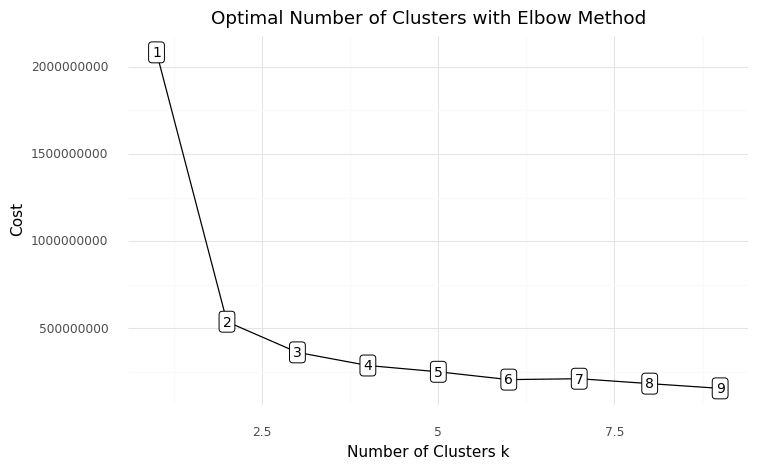

<ggplot: (163697705457)>

In [27]:
# Converting the results into a dataframe and plotting them.
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

# Data viz.
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal Number of Clusters with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

**Observation**:
- Graph above selects an Elbow point at K=3, but K=2 also looks like a plausible elbow point. Hence, it is not clear what should be the Elbow point.

To validate the value of K, Silhouette plot is used.

**Silhouette Score**

Silhouette Coefficient or silhouette score is used to calculate the goodness of a clustering technique. Its value ranges from `-1` to `1` ([source](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)).

`1`: Means clusters are well apart from each other and clearly distinguished. <br>
`0`: Means clusters are indifferent, or we can say that the distance between clusters is not significant.<br>
`-1`: Means clusters are assigned in the wrong way.<br>

In [29]:
# Drop Id.
train_dataframe = train_dataframe.drop(['Id'],axis=1)

# Convert categorical data to numerical data
train_dataframe_Silhouette = pd.get_dummies(train_dataframe, columns = ['Product_Info_2'], drop_first = True)

# Convert dataframe to matrix
dfMatrix = train_dataframe_Silhouette.to_numpy()

# Choose optimal K using Silhouette Score.
sil_scores = []
for cluster in range(2, 10):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        clusters = kprototype.fit_predict(dfMatrix, categorical=catColumnsPos)
        sil_score = silhouette_score(dfMatrix, clusters)
        sil_scores.append(sil_score)
        print('Silhouette Score for %i Clusters: %0.4f' % (cluster, sil_score))
    except Exception as e:
        print(e)
        break

Silhouette Score for 2 Clusters: 0.6493
Silhouette Score for 3 Clusters: 0.5429
Silhouette Score for 4 Clusters: 0.4987
Silhouette Score for 5 Clusters: 0.4812
Silhouette Score for 6 Clusters: 0.4947
Silhouette Score for 7 Clusters: 0.5050
Silhouette Score for 8 Clusters: 0.4394
Silhouette Score for 9 Clusters: 0.5083


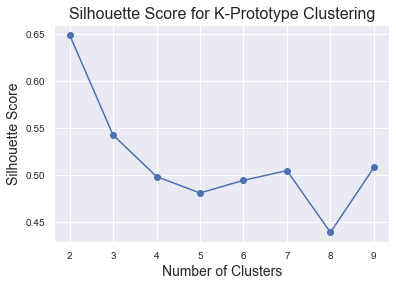

In [30]:
# Set font size for tick labels on x-axis and y-axis
plt.tick_params(axis='both', labelsize=10)

# Plot the Silhouette Scores for each value of K.
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Score for K-Prototype Clustering', fontsize=16)
plt.show()

In [31]:
# Choose the optimal K value based on the Silhouette Score.
optimal_k = np.argmax(sil_scores) + 2
print('Optimal number of clusters: %d' % optimal_k)

Optimal number of clusters: 2


Scatterplot below shows distribution of data.

C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


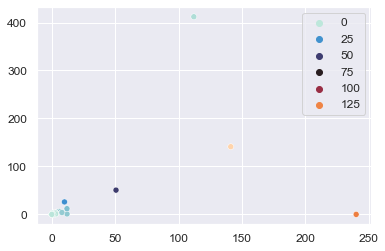

In [32]:
# Draw scatterplot to show clusters.
sns.scatterplot(dfMatrix[0], dfMatrix[1], dfMatrix[2], hue = clusters, palette ='icefire')

# Resize x-axis and y-axis tick labels
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Move legend to upper right and resize the legend.
plt.legend(loc='upper right', prop={'size': 12})

# Show plot
plt.show()

**Observation**:
- Optimal number of clusters is 2 as it has the highest Silhouette Score.

### Model Building

In [33]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

**Find All Cluster Centers**

In [34]:
# Cluster centorid.
kprototype.cluster_centroids_

array([[1.02602493e+00, 2.45521413e+01, 2.00684591e+00, 2.66893993e+00,
        1.04381908e+00, 4.01907528e-01, 7.08378763e-01, 2.92846141e-01,
        4.68607362e-01, 7.82246113e-02, 8.68419952e+00, 1.29735309e+00,
        6.12637201e-03, 2.13373050e+00, 3.59982837e-01, 1.23260432e+00,
        2.00749915e+00, 5.84837083e+00, 2.88377623e+00, 1.02889917e+00,
        1.39092263e+00, 1.04285229e+00, 1.73959395e+00, 1.05218050e+00,
        2.11455149e+00, 1.98735335e+00, 1.77030158e-03, 1.93214183e+00,
        2.05573411e+00, 2.43534269e+00, 2.69527841e+00, 4.72723397e-01,
        4.97645388e-01, 4.41971011e-01, 4.84871769e-01, 7.72971758e+00,
        1.34221133e+02, 2.10015416e+00, 1.65950720e+00, 1.00640171e+00,
        2.89671030e+00, 2.01149696e+00, 2.04000418e+00, 1.79091218e+00,
        1.41099236e+02, 2.99482637e+00, 2.05301664e+00, 2.79608581e+00,
        2.97042147e+00, 1.23268257e+02, 1.30234381e+00, 2.98001097e+00,
        1.04894045e+00, 1.03083275e+00, 1.98688302e+00, 1.099892

**Check Iteration of Clusters Created**

In [35]:
# Check the iteration of the clusters created.
print("Iteration of Clusters Created:", kprototype.n_iter_)

Iteration of Clusters Created: 5


**Check Cost of Clusters Created**

In [36]:
# Check the cost of the clusters created.
print("Cost of Clusters Created:", '${:,.0f}'.format(kprototype.cost_))

Cost of Clusters Created: $538,017,653


**Creating Target Column Cluster**

Interpretation on clusters is required. The interpretation is using the centroids in each cluster. To do so, cluster labels have to be appended to the raw data. Ordering the cluster labels will be helpful to arrange the interpretation based on cluster labels ([source](https://www.kaggle.com/code/jillanisofttech/market-segmentation-unsupervised-learning)).

In [37]:
# Create a target column cluster for storing the cluster segment.
train_dataframe_cluster = pd.concat([train_dataframe,pd.DataFrame({'cluster':kprototype.labels_})],axis=1)

# Display first 5 rows of dataframe with target column cluster.
train_dataframe_cluster.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0               1             D3              10        0.076923   
1               1             A1              26        0.076923   
2               1             E1              26        0.076923   
3               1             D4              10        0.487179   
4               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
1               2               3               1  0.059701  0.600000   
2               2               3               1  0.029851  0.745455   
3               2               3               1  0.164179  0.672727   
4               2               3               1  0.417910  0.654545   

         Wt       BMI  Employment_Info_1  Employment_Info_2  \
0  0.148536  0.323008              0.028                 12   
1  0.131799  0.272288              0.000                  1   
2  0.288703  0.428780              0.030                  9   
3  0.205021  0.352438              0.042                  9   
4  0.234310  0.424046              0.027                  9   

   Employment_Info_3  Employment_Info_4  Employment_Info_5  Employment_Info_6  \
0                  1                0.0                  3           0.361469   
1                  3                0.0                  2           0.001800   
2                  1                0.0                  2           0.030000   
3                  1                0.0                  3           0.200000   
4                  1                0.0                  2           0.050000   

   InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
0              1              2              6              3              1   
1              1              2              6              3              1   
2              1              2              8              3              1   
3              2              2              8              3              1   
4              1              2              6              3              1   

   InsuredInfo_6  InsuredInfo_7  Insurance_History_1  Insurance_History_2  \
0              2              1                    1                    1   
1              2              1                    2                    1   
2              1              1                    2                    1   
3              2              1                    2                    1   
4              2              1                    2                    1   

   Insurance_History_3  Insurance_History_4  Insurance_History_5  \
0                    3                    1             0.000667   
1                    3                    1             0.000133   
2                    1                    3             0.001733   
3                    1                    3             0.001733   
4                    1                    3             0.001733   

   Insurance_History_7  Insurance_History_8  Insurance_History_9  \
0                    1                    1                    2   
1                    1                    3                    2   
2                    3                    2                    3   
3                    3                    2                    3   
4                    3                    2                    3   

   Family_Hist_1  Family_Hist_2  Family_Hist_3  Family_Hist_4  Family_Hist_5  \
0              2       0.474550       0.598039       0.444890       0.526786   
1              2       0.188406       0.497737       0.084507       0.484635   
2              3       0.304348       0.497737       0.225352       0.484635   
3              3       0.420290       0.497737       0.352113       0.484635   
4              2       0.463768       0.497737       0.408451       0.484635   

   Medical_History_1  Medical_History_2  Medic

**Visualizing Cluster 0**

In [38]:
# Display first 5 rows of dataframe with target column cluster = 0.
cluster_0_df = train_dataframe_cluster[train_dataframe_cluster["cluster"]==0]
cluster_0_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0               1             D3              10        0.076923   
2               1             E1              26        0.076923   
4               1             D2              26        0.230769   
7               1             D2              26        0.076923   
8               1             D3              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.641791  0.581818   
2               2               3               1  0.029851  0.745455   
4               2               3               1  0.417910  0.654545   
7               2               3               1  0.611940  0.781818   
8               2               3               1  0.522388  0.618182   

         Wt       BMI  Employment_Info_1  Employment_Info_2  \
0  0.148536  0.323008              0.028                 12   
2  0.288703  0.428780              0.030                  9   
4  0.234310  0.424046              0.027                  9   
7  0.403766  0.571612              0.120                 12   
8  0.184100  0.362643              0.165                  9   

   Employment_Info_3  Employment_Info_4  Employment_Info_5  Employment_Info_6  \
0                  1                0.0                  3           0.361469   
2                  1                0.0                  2           0.030000   
4                  1                0.0                  2           0.050000   
7                  1                0.0                  2           1.000000   
8                  1                0.0                  2           1.000000   

   InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
0              1              2              6              3              1   
2              1              2              8              3              1   
4              1              2              6              3              1   
7              1              2              6              3              1   
8              1              2              3              2              1   

   InsuredInfo_6  InsuredInfo_7  Insurance_History_1  Insurance_History_2  \
0              2              1                    1                    1   
2              1              1                    2                    1   
4              2              1                    2                    1   
7              1              1                    1                    1   
8              1              1                    1                    1   

   Insurance_History_3  Insurance_History_4  Insurance_History_5  \
0                    3                    1             0.000667   
2                    1                    3             0.001733   
4                    1                    3             0.001733   
7                    3                    1             0.000667   
8                    3                    2             0.007613   

   Insurance_History_7  Insurance_History_8  Insurance_History_9  \
0                    1                    1                    2   
2                    3                    2                    3   
4                    3                    2                    3   
7                    1                    1                    2   
8                    1                    1                    2   

   Family_Hist_1  Family_Hist_2  Family_Hist_3  Family_Hist_4  Family_Hist_5  \
0              2       0.474550       0.598039       0.444890       0.526786   
2              3       0.304348       0.497737       0.225352       0.484635   
4              2       0.463768       0.497737       0.408451       0.484635   
7              2       0.474550       0.490196       0.444890       0.633929   
8              3       0.474550       0.529412       0.676056       0.484635   

   Medical_History_1  Medical_History_2  Medic

In [39]:
# Print shape of dataframe.
print(f"Shape:", cluster_0_df.shape)

Shape: (38271, 128)


**Visualizing Cluster 1**

In [40]:
# Display first 5 rows of dataframe with target column cluster = 1.
cluster_1_df = train_dataframe_cluster[train_dataframe_cluster["cluster"]==1]
cluster_1_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
1                1             A1              26        0.076923   
3                1             D4              10        0.487179   
5                1             D2              26        0.230769   
6                1             A8              10        0.166194   
10               1             D3              26        0.128205   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
1                2               3               1  0.059701  0.600000   
3                2               3               1  0.164179  0.672727   
5                3               1               1  0.507463  0.836364   
6                2               3               1  0.373134  0.581818   
10               2               3               1  0.537313  0.690909   

          Wt       BMI  Employment_Info_1  Employment_Info_2  \
1   0.131799  0.272288              0.000                  1   
3   0.205021  0.352438              0.042                  9   
5   0.299163  0.364887              0.325                 15   
6   0.173640  0.376587              0.110                  1   
10  0.309623  0.521668              0.050                  9   

    Employment_Info_3  Employment_Info_4  Employment_Info_5  \
1                   3           0.000000                  2   
3                   1           0.000000                  3   
5                   1           0.000000                  2   
6                   3           0.006283                  3   
10                  1           0.006283                  2   

    Employment_Info_6  InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  \
1              0.0018              1              2              6   
3              0.2000              2              2              8   
5              1.0000              1              2              8   
6              0.8000              1              2              3   
10             0.1500              1              2              4   

    InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  InsuredInfo_7  \
1               3              1              2              1   
3               3              1              2              1   
5               3              1              1              1   
6               3              1              2              1   
10              2              1              1              1   

    Insurance_History_1  Insurance_History_2  Insurance_History_3  \
1                     2                    1                    3   
3                     2                    1                    1   
5                     2                    1                    3   
6                     1                    1                    3   
10                    1                    1                    3   

    Insurance_History_4  Insurance_History_5  Insurance_History_7  \
1                     1             0.000133                    1   
3                     3             0.001733                    3   
5                     2             0.005000                    1   
6                     2             0.001667                    1   
10                    1             0.000587                    1   

    Insurance_History_8  Insurance_History_9  Family_Hist_1  Family_Hist_2  \
1                     3                    2              2       0.188406   
3                     2                    3              3       0.420290   
5                     3                    2              2       0.474550   
6                     1                    2              3       0.594203   
10                    1                    2              3       0.474550   

    Family_Hist_3  Family_Hist_4  Family_Hist_5  Medical_History_1  \
1        0.497737       0.084507       0.484635                5.0   
3        0.497737       0.352113       0.484635                0.0   
5        0.294118       0.507042       0.484635      

In [41]:
# Print shape of dataframe.
print(f"Shape:", cluster_1_df.shape)

Shape: (21110, 128)


**Histogram Distribution**

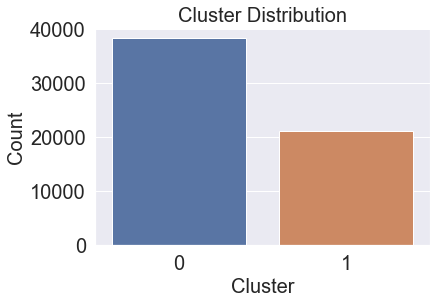

In [42]:
# Draw a histogram to show distribution of clusters.
hist = sns.countplot(x='cluster', data=train_dataframe_cluster)
hist.axes.set_title("Cluster Distribution",fontsize=20)
hist.set_xlabel("Cluster",fontsize=20)
hist.set_ylabel("Count",fontsize=20)
hist.tick_params(labelsize=20)
plt.show()

**Observations**:
- Data (by number of count) is almost uniformly distrbuted across all 2 clusters.
- Cluster 0 has the highest count of data; and cluster 1 has the lowest count of data.

C:\Users\USER\miniforge3\envs\dsi-sg\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


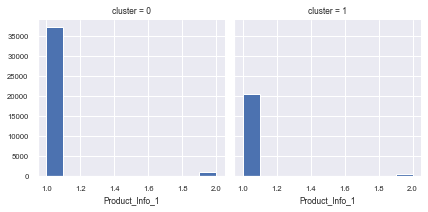

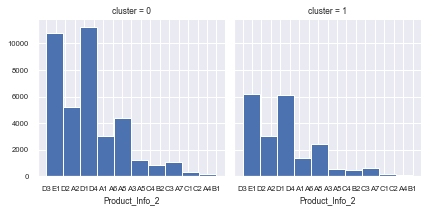

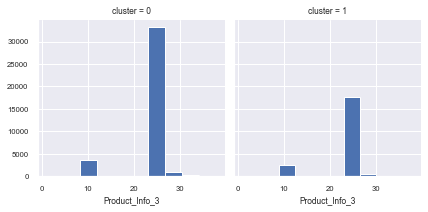

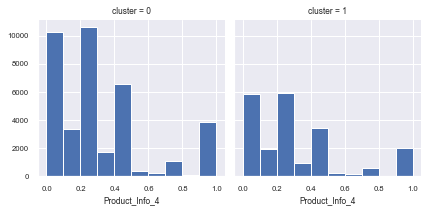

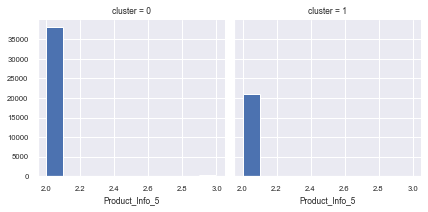

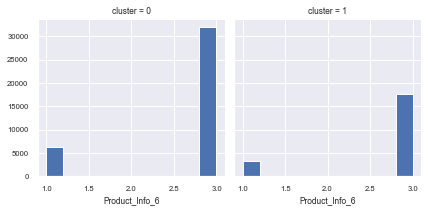

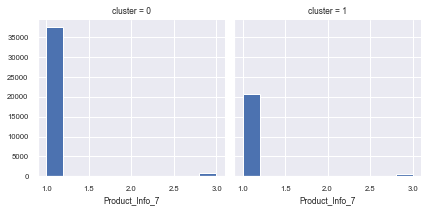

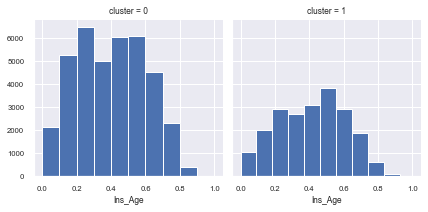

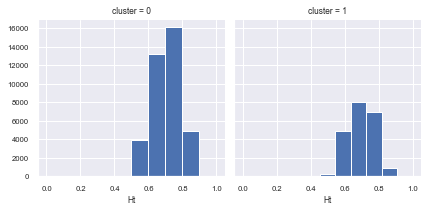

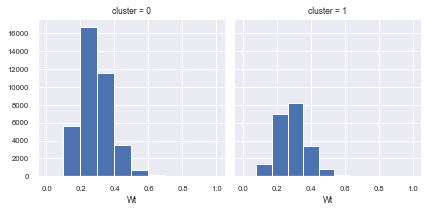

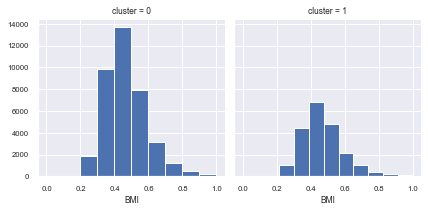

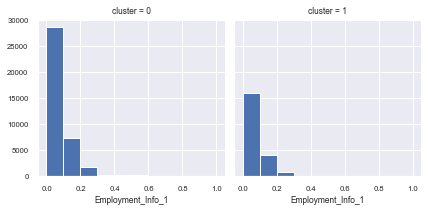

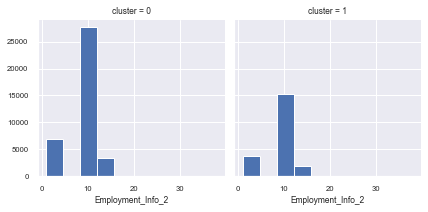

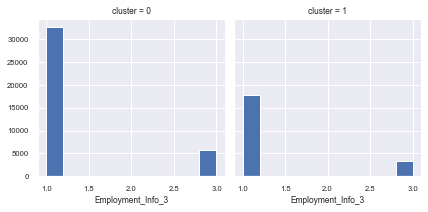

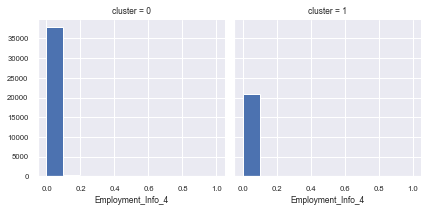

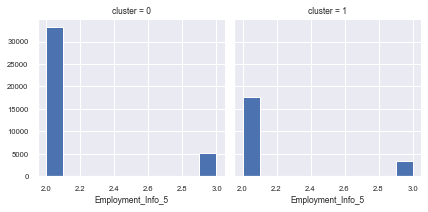

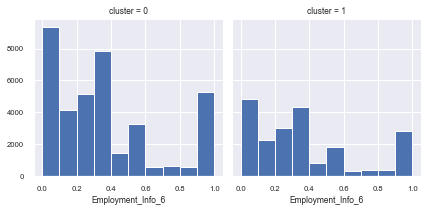

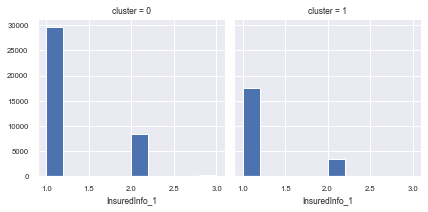

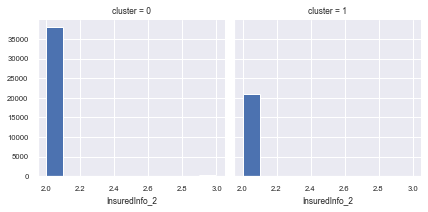

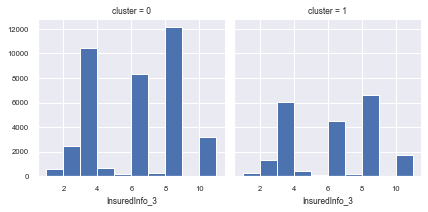

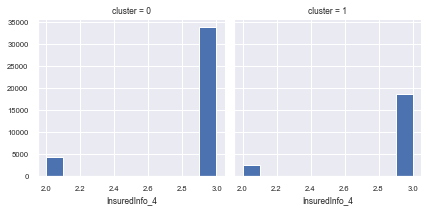

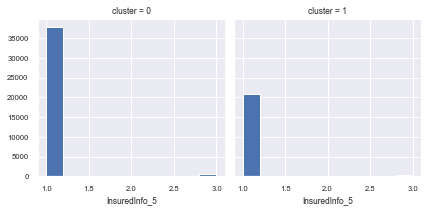

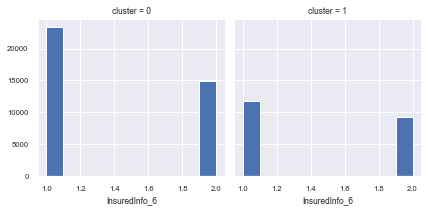

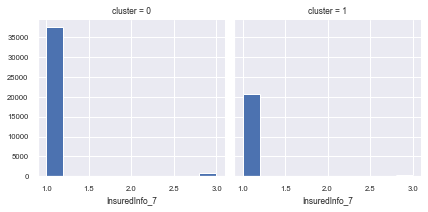

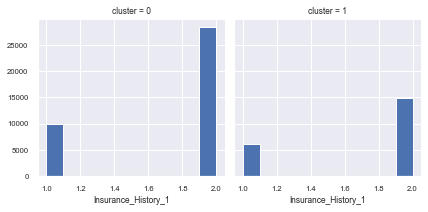

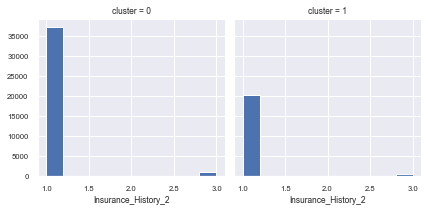

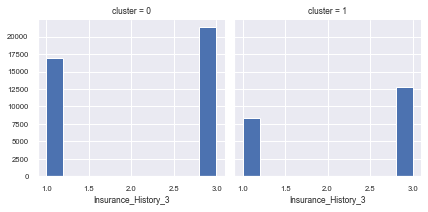

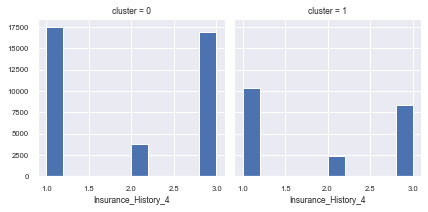

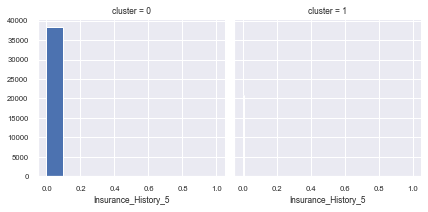

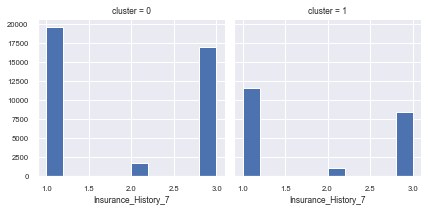

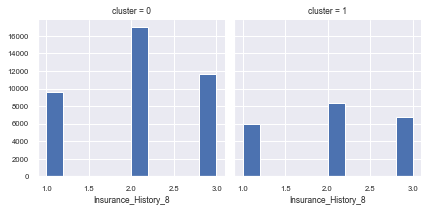

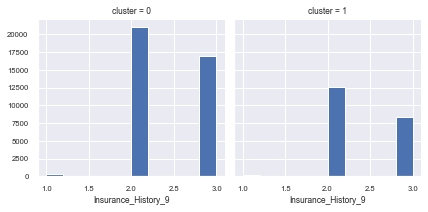

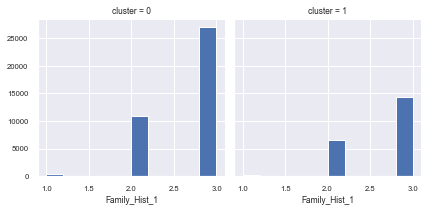

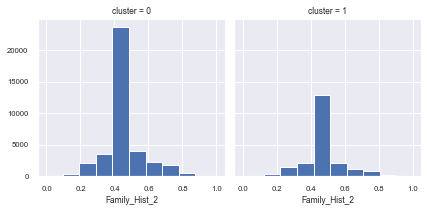

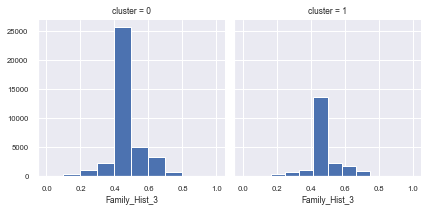

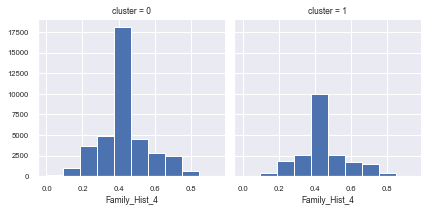

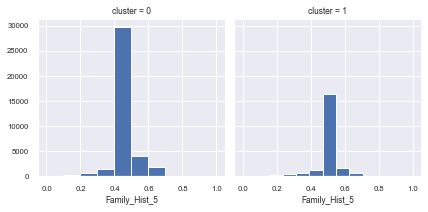

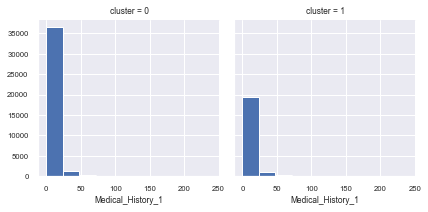

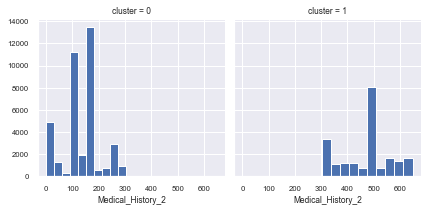

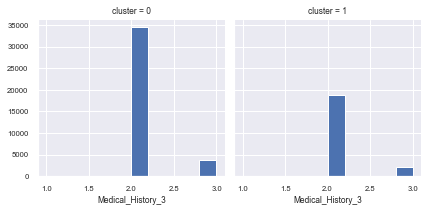

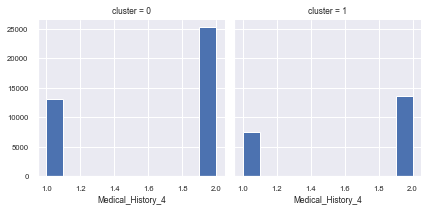

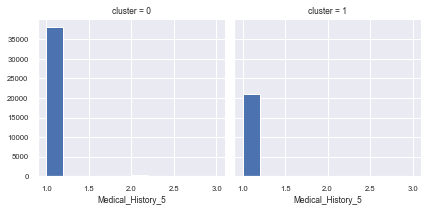

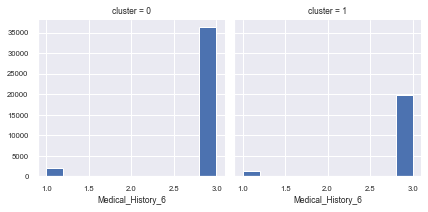

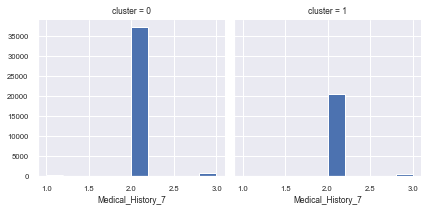

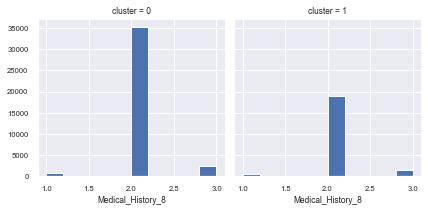

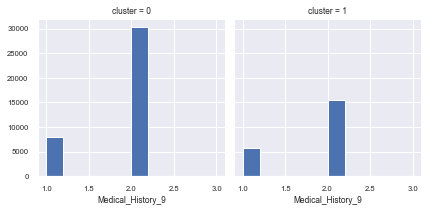

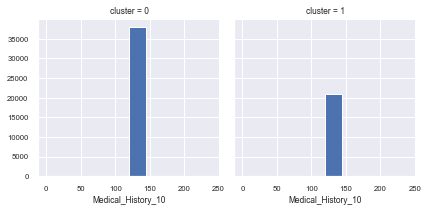

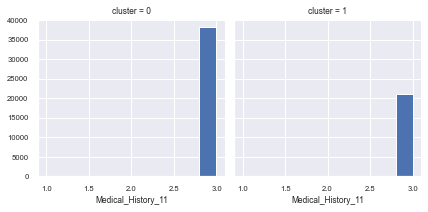

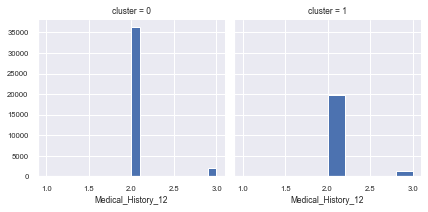

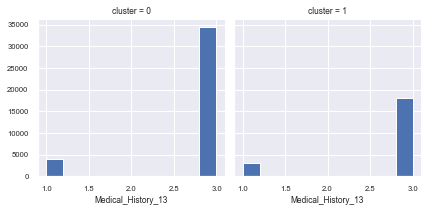

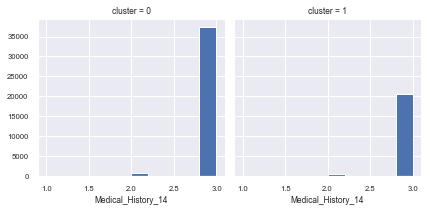

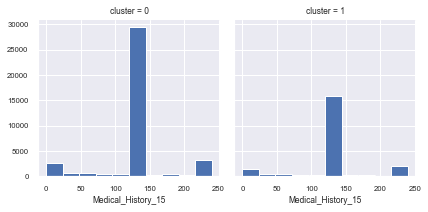

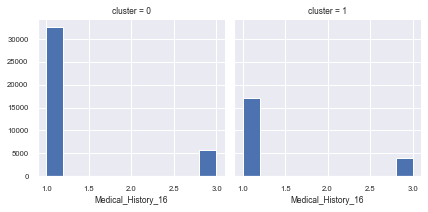

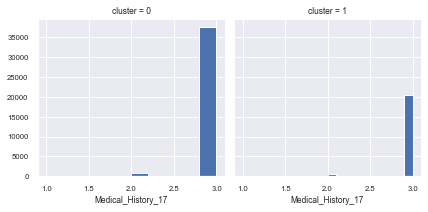

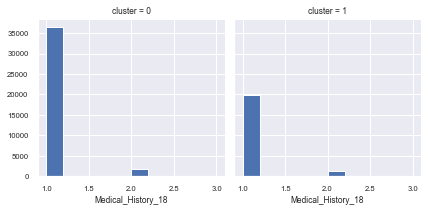

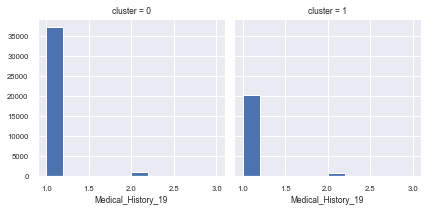

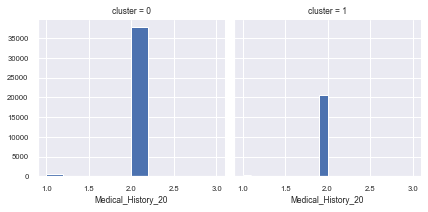

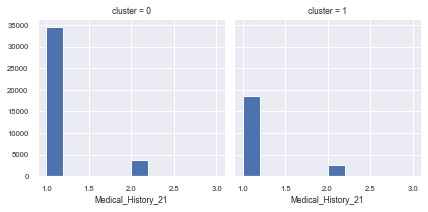

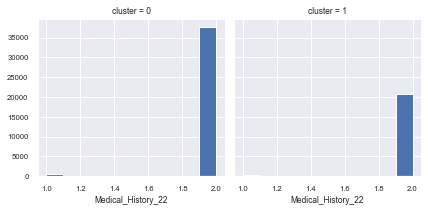

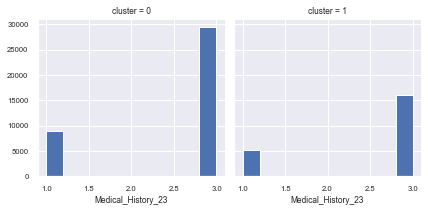

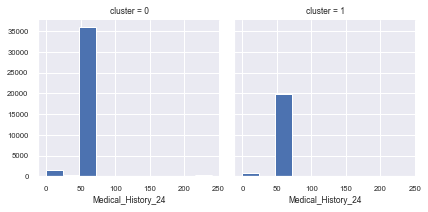

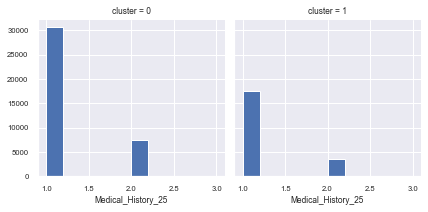

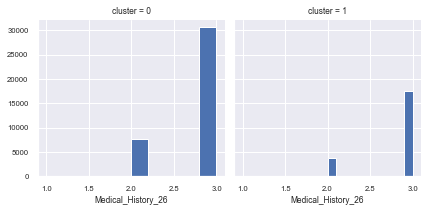

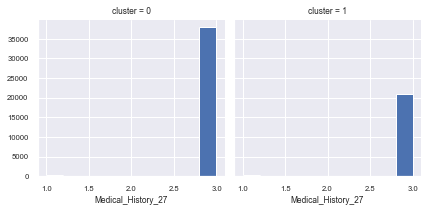

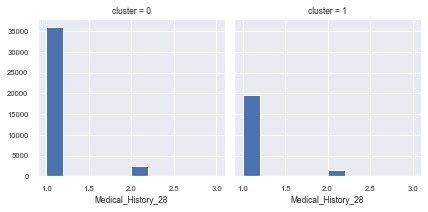

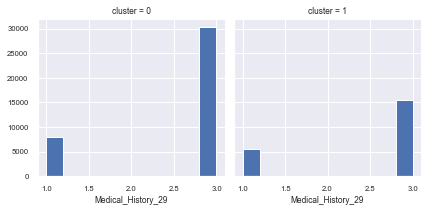

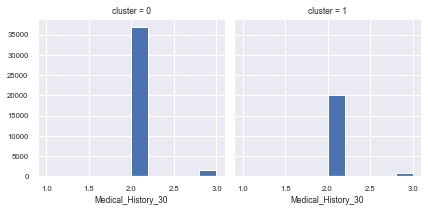

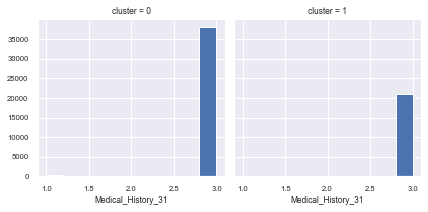

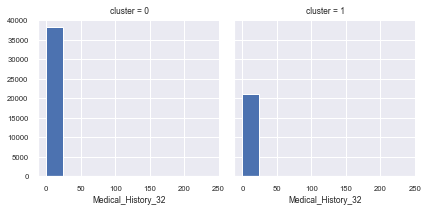

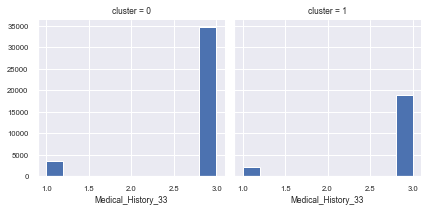

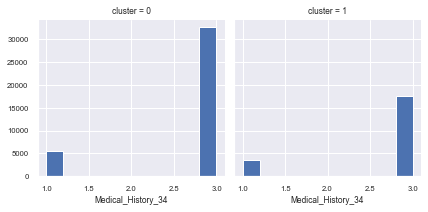

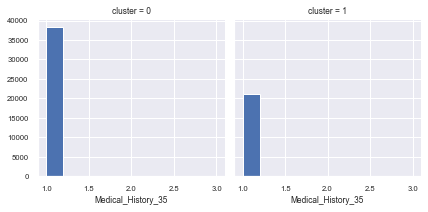

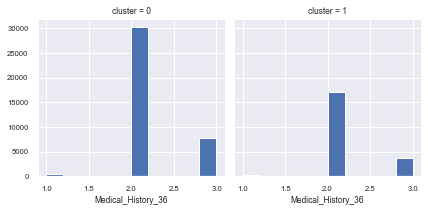

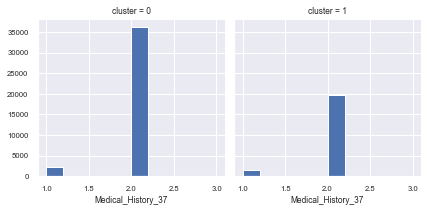

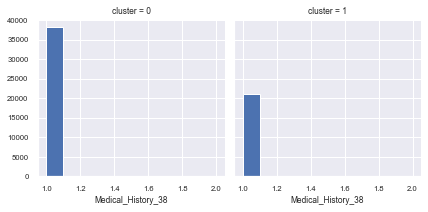

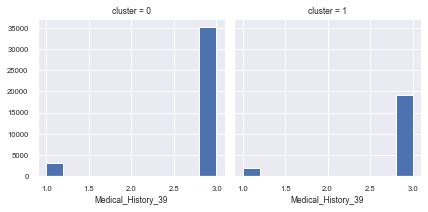

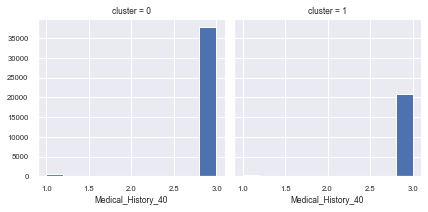

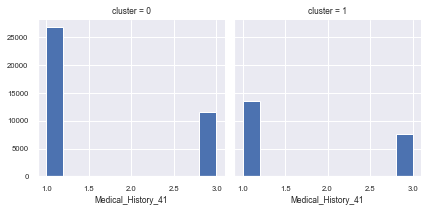

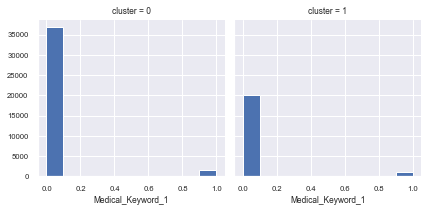

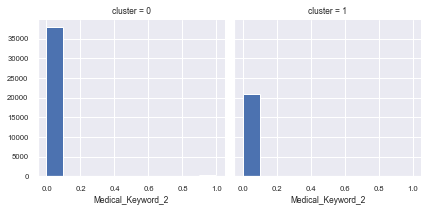

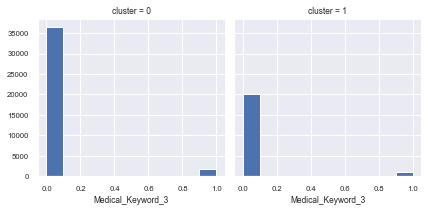

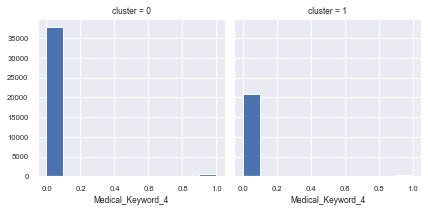

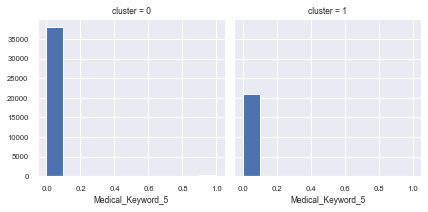

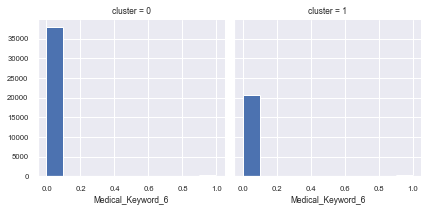

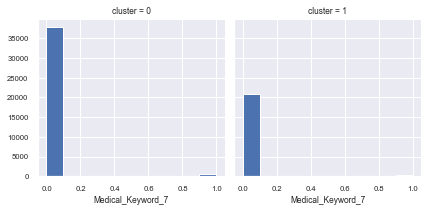

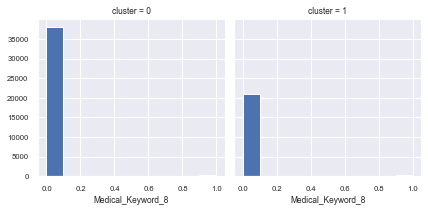

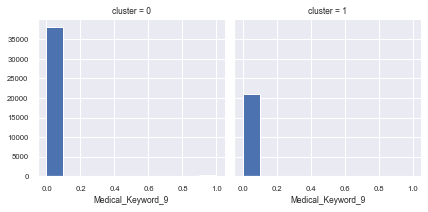

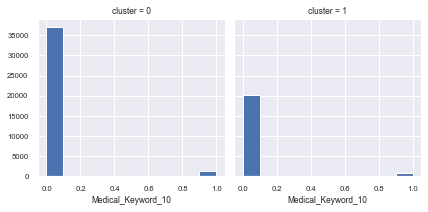

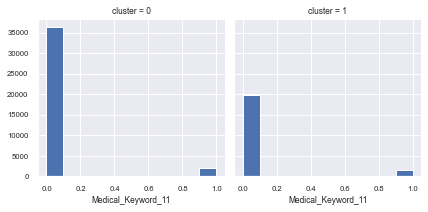

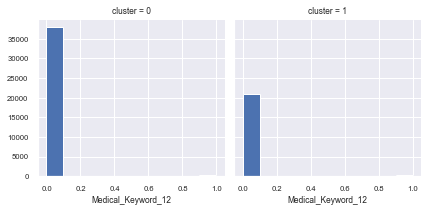

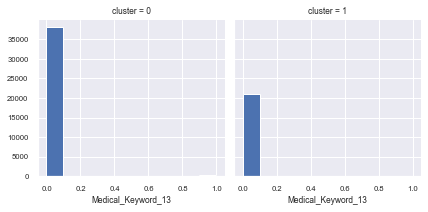

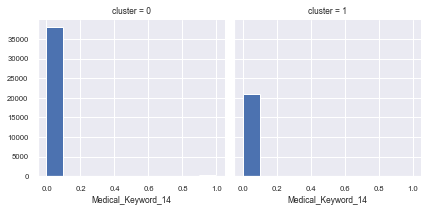

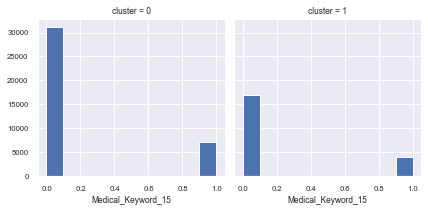

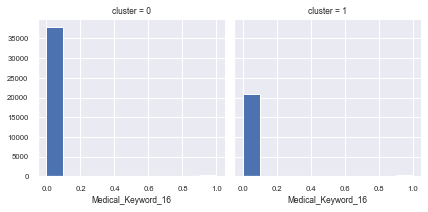

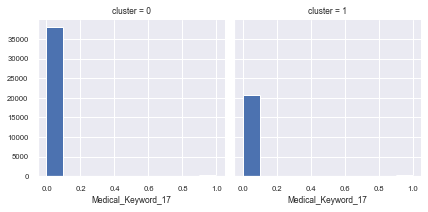

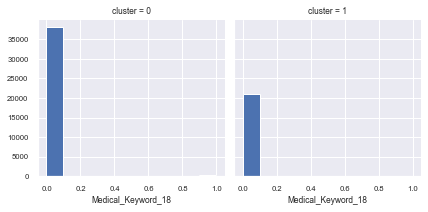

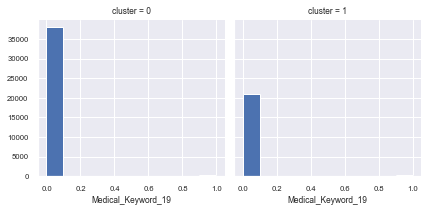

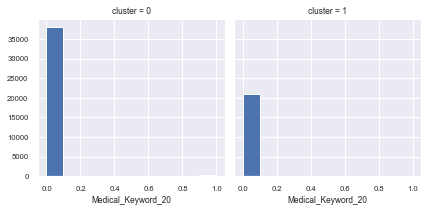

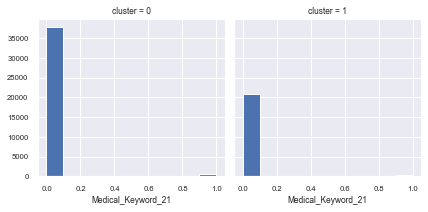

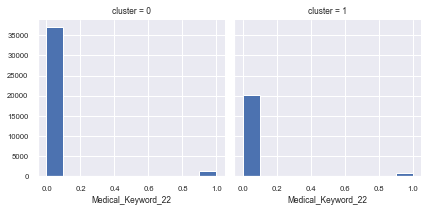

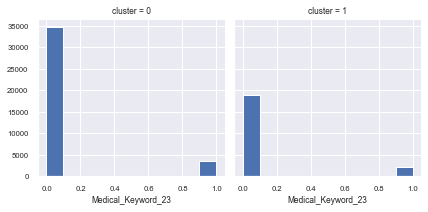

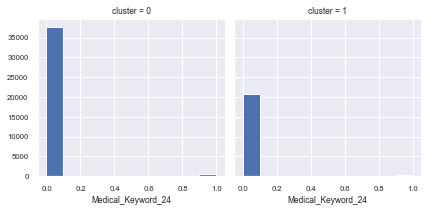

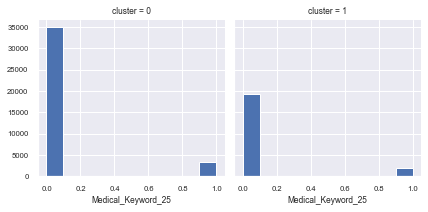

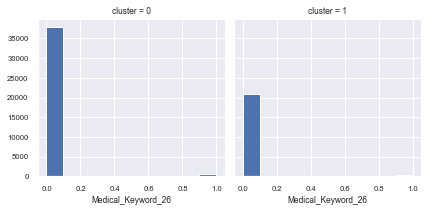

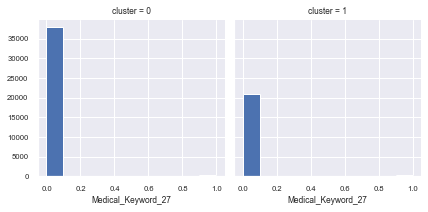

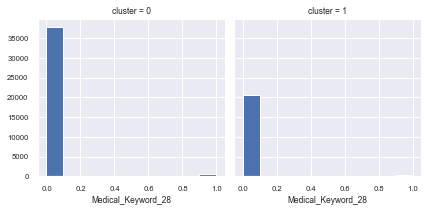

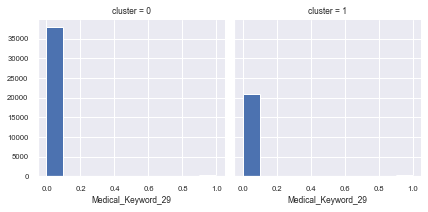

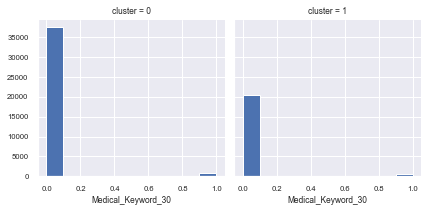

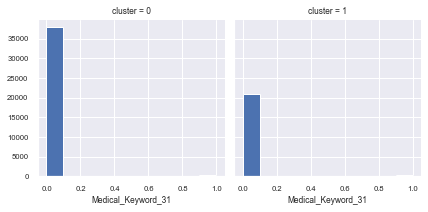

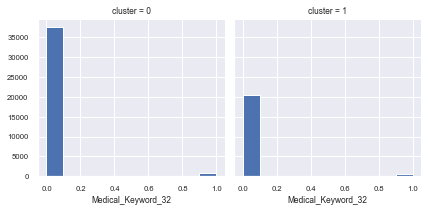

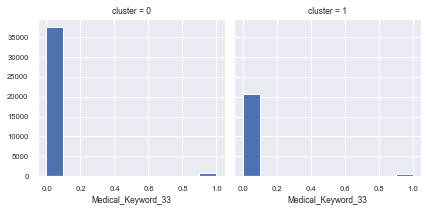

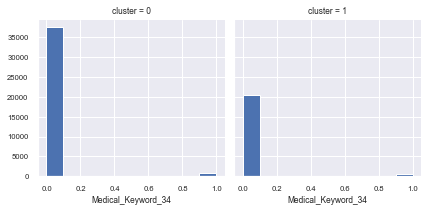

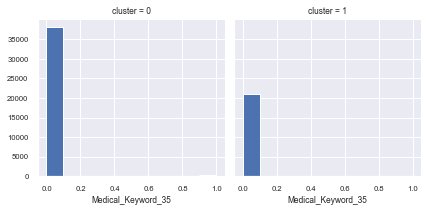

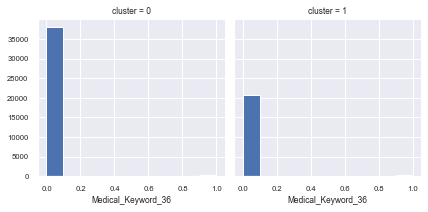

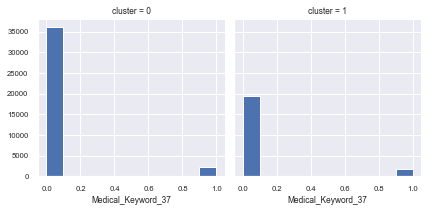

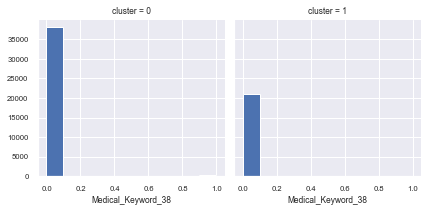

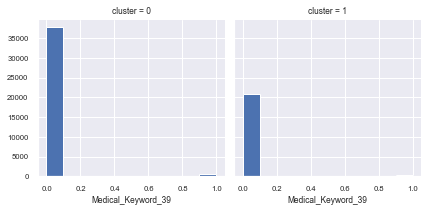

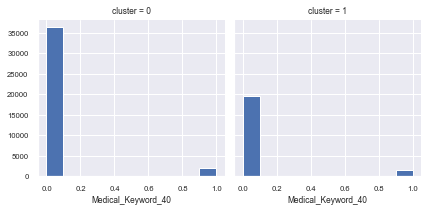

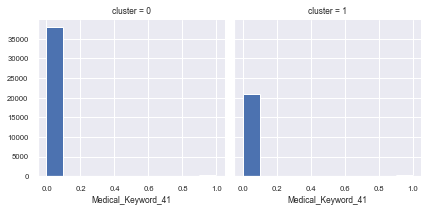

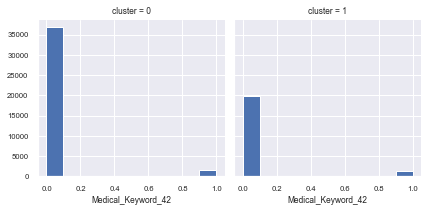

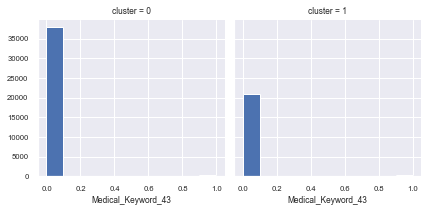

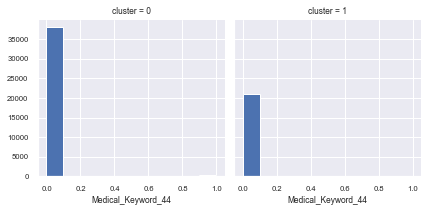

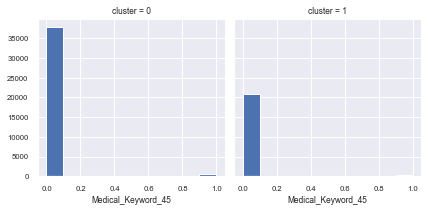

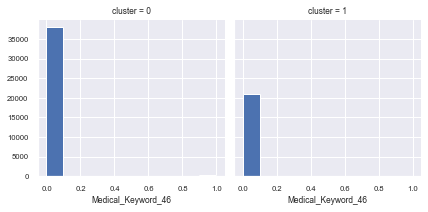

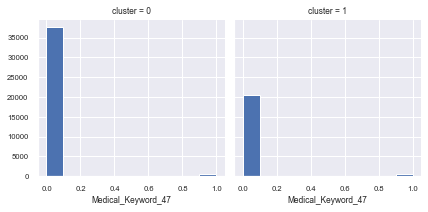

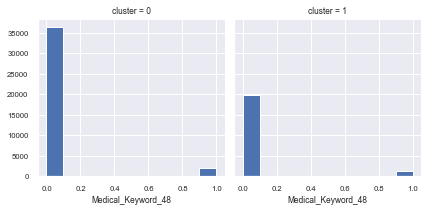

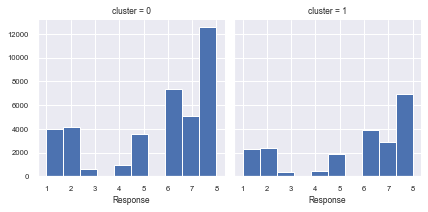

In [43]:
# Set font scale.
sns.set(font_scale=0.7)

# Loop through each cluster's features except its own column
for index in train_dataframe_cluster.drop(['cluster'],axis=1):
    grid= sns.FacetGrid(train_dataframe_cluster, col='cluster')
    grid= grid.map(plt.hist, index)
plt.show()

**Observations**:
- Data distribution is identifical across all items in these 2 clusters.

To interpret the cluster, for the numerical variables, it will be using the average while the categorical use the mode. 

In [45]:
# Cluster interpretation
train_dataframe_cluster.groupby('cluster').agg(
    {
        'Product_Info_2': lambda x: x.value_counts().index[0],
        'Product_Info_1': 'mean',
        'Product_Info_3': 'mean',
        'Product_Info_4': 'mean',
        'Product_Info_5': 'mean',
        'Product_Info_6': 'mean', 
        'Product_Info_7': 'mean', 
        'Ins_Age': 'mean', 
        'Ht': 'mean', 
        'Wt': 'mean', 
        'BMI': 'mean', 
        'Employment_Info_1': 'mean', 
        'Employment_Info_2': 'mean', 
        'Employment_Info_3': 'mean', 
        'Employment_Info_4': 'mean', 
        'Employment_Info_5': 'mean', 
        'Employment_Info_6': 'mean', 
        'InsuredInfo_1': 'mean', 
        'InsuredInfo_2': 'mean', 
        'InsuredInfo_3': 'mean', 
        'InsuredInfo_4': 'mean', 
        'InsuredInfo_5': 'mean', 
        'InsuredInfo_6': 'mean', 
        'InsuredInfo_7': 'mean', 
        'Insurance_History_1': 'mean', 
        'Insurance_History_2': 'mean', 
        'Insurance_History_3': 'mean', 
        'Insurance_History_4': 'mean', 
        'Insurance_History_5': 'mean', 
        'Insurance_History_7': 'mean', 
        'Insurance_History_8': 'mean', 
        'Insurance_History_9': 'mean', 
        'Family_Hist_1': 'mean', 
        'Family_Hist_2': 'mean', 	
        'Family_Hist_3': 'mean', 	
        'Family_Hist_4': 'mean', 	
        'Family_Hist_5': 'mean', 	
        'Medical_History_1': 'mean', 	
        'Medical_History_2': 'mean', 	
        'Medical_History_3': 'mean', 	
        'Medical_History_4': 'mean', 	
        'Medical_History_5': 'mean', 
        'Medical_History_6': 'mean', 	
        'Medical_History_7': 'mean', 	
        'Medical_History_8': 'mean', 	
        'Medical_History_9': 'mean', 	
        'Medical_History_10': 'mean', 	
        'Medical_History_11': 'mean', 	
        'Medical_History_12': 'mean', 	
        'Medical_History_13': 'mean', 	
        'Medical_History_14': 'mean', 	
        'Medical_History_15': 'mean', 
        'Medical_History_16': 'mean', 	
        'Medical_History_17': 'mean', 	
        'Medical_History_18': 'mean', 	
        'Medical_History_19': 'mean', 	
        'Medical_History_20': 'mean', 	
        'Medical_History_21': 'mean', 	
        'Medical_History_22': 'mean', 	
        'Medical_History_23': 'mean', 	
        'Medical_History_24': 'mean', 	
        'Medical_History_25': 'mean', 	
        'Medical_History_26': 'mean', 	
        'Medical_History_27': 'mean', 	
        'Medical_History_28': 'mean', 	
        'Medical_History_29': 'mean', 	
        'Medical_History_30': 'mean', 	
        'Medical_History_31': 'mean', 
        'Medical_History_32': 'mean', 	
        'Medical_History_33': 'mean', 	
        'Medical_History_34': 'mean', 	
        'Medical_History_35': 'mean', 	
        'Medical_History_36': 'mean', 
        'Medical_History_37': 'mean', 	
        'Medical_History_38': 'mean', 	
        'Medical_History_39': 'mean', 	
        'Medical_History_40': 'mean', 	
        'Medical_History_41': 'mean', 	
        'Medical_Keyword_1': 'mean', 	
        'Medical_Keyword_2': 'mean', 	
        'Medical_Keyword_3': 'mean', 	
        'Medical_Keyword_4': 'mean', 	
        'Medical_Keyword_5': 'mean', 	
        'Medical_Keyword_6': 'mean', 	
        'Medical_Keyword_7': 'mean', 	
        'Medical_Keyword_8': 'mean', 	
        'Medical_Keyword_9': 'mean', 	
        'Medical_Keyword_10': 'mean', 	
        'Medical_Keyword_11': 'mean', 	
        'Medical_Keyword_12': 'mean', 
        'Medical_Keyword_13': 'mean', 	
        'Medical_Keyword_14': 'mean', 	
        'Medical_Keyword_15': 'mean', 	
        'Medical_Keyword_16': 'mean', 	
        'Medical_Keyword_17': 'mean', 	
        'Medical_Keyword_18': 'mean', 	
        'Medical_Keyword_19': 'mean', 	
        'Medical_Keyword_20': 'mean', 	
        'Medical_Keyword_21': 'mean', 	
        'Medical_Keyword_22': 'mean', 	
        'Medical_Keyword_23': 'mean', 	
        'Medical_Keyword_24': 'mean', 	
        'Medical_Keyword_25': 'mean', 	
        'Medical_Keyword_26': 'mean',	
        'Medical_Keyword_27': 'mean',	
        'Medical_Keyword_28': 'mean',	
        'Medical_Keyword_29': 'mean',	
        'Medical_Keyword_30': 'mean',	
        'Medical_Keyword_31': 'mean',	
        'Medical_Keyword_32': 'mean',	
        'Medical_Keyword_33': 'mean',	
        'Medical_Keyword_34': 'mean',	
        'Medical_Keyword_35': 'mean',	
        'Medical_Keyword_36': 'mean',	
        'Medical_Keyword_37': 'mean',	
        'Medical_Keyword_38': 'mean',	
        'Medical_Keyword_39': 'mean',	
        'Medical_Keyword_40': 'mean',	
        'Medical_Keyword_41': 'mean',	
        'Medical_Keyword_42': 'mean',	
        'Medical_Keyword_43': 'mean',	
        'Medical_Keyword_44': 'mean',	
        'Medical_Keyword_45': 'mean',	
        'Medical_Keyword_46': 'mean',	
        'Medical_Keyword_47': 'mean',	
        'Medical_Keyword_48': 'mean',	
        'Response': 'mean'   
    }
).reset_index()

cluster Product_Info_2  Product_Info_1  Product_Info_3  Product_Info_4  \
0        0             D3        1.026025       24.552141        0.332137   
1        1             D3        1.026954       24.168214        0.323178   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0        2.006846        2.668940        1.043819  0.401908  0.708379   
1        2.007153        2.682046        1.043155  0.412200  0.705297   

         Wt       BMI  Employment_Info_1  Employment_Info_2  \
0  0.292846  0.468607           0.078225           8.684200   
1  0.292117  0.471012           0.076417           8.564993   

   Employment_Info_3  Employment_Info_4  Employment_Info_5  Employment_Info_6  \
0           1.297353           0.006126           2.133731           0.359983   
1           1.307342           0.006566           2.159687           0.364163   

   InsuredInfo_1  InsuredInfo_2  InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  \
0       1.232604       2.007499       5.848371       2.883776       1.028899   
1       1.167125       2.007295       5.813122       2.883468       1.024064   

   InsuredInfo_6  InsuredInfo_7  Insurance_History_1  Insurance_History_2  \
0       1.390923       1.042852             1.739594             1.052181   
1       1.442302       1.030696             1.705874             1.062340   

   Insurance_History_3  Insurance_History_4  Insurance_History_5  \
0             2.114551             1.987353             0.001770   
1             2.205779             1.906774             0.001666   

   Insurance_History_7  Insurance_History_8  Insurance_History_9  \
0             1.932142             2.055734             2.435343   
1             1.847324             2.035339             2.390384   

   Family_Hist_1  Family_Hist_2  Family_Hist_3  Family_Hist_4  Family_Hist_5  \
0       2.695278       0.472723       0.497645       0.441971       0.484872   
1       2.669825       0.477862       0.497904       0.450183       0.484206   

   Medical_History_1  Medical_History_2  Medical_History_3  Medical_History_4  \
0           7.729718         134.221133           2.100154           1.659507   
1           8.383597         471.114685           2.105827           1.646471   

   Medical_History_5  Medical_History_6  Medical_History_7  Medical_History_8  \
0           1.006402           2.896710           2.011497           2.040004   
1           1.009095           2.877546           2.013690           2.051492   

   Medical_History_9  Medical_History_10  Medical_History_11  \
0           1.790912          141.099236            2.994826   
1           1.731928          141.153402            2.992042   

   Medical_History_12  Medical_History_13  Medical_History_14  \
0            2.053017            2.796086            2.970421   
1            2.063098            2.717480            2.965135   

   Medical_History_15  Medical_History_16  Medical_History_17  \
0          123.268257            1.302344            2.980011   
1          124.654237            1.373188            2.974372   

   Medical_History_18  Medical_History_19  Medical_History_20  \
0            1.048940            1.030833            1.986883   
1            1.061866            1.041023            1.981810   

   Medical_History_21  Medical_History_22  Medical_History_23  \
0            1.099893            1.982258            2.534765   
1            1.125486            1.980531            2.516059   

   Medical_History_24  Medical_History_25  Medical_History_26  \
0           50.535915            1.204254            2.799247   
1           50.816385            1.178115            2.826622   

   Medical_History_27  Medical_History_28  Medical_History_29  \
0            2.980978            1.061901            2.579708   
1            2.978825            1.076836            2.475604   

   Medical_History_30  Medical_History_31  Medical_History_32  \
0            2.039116            2.985368           11.917724   
1     

**Saving Data with Cluster Labels Before Converting Categorical Data to Numerical Data**

In [46]:
train_dataframe_cluster.to_csv("./datasets/train_dataframe_cluster_with_categorical_data.csv")

**Convert Categorical Data to Numerical Data**

In [47]:
# Convert categorical data to numerical data using get_dummies.
# Set drop_first = True to exclude dummy variable for the first category of the variable.
train_dataframe_cluster = pd.get_dummies(train_dataframe_cluster, columns = ['Product_Info_2'], drop_first = True)

In [48]:
# Displays first 5 rows of dataframe.
train_dataframe_cluster.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0               1              10        0.076923               2   
1               1              26        0.076923               2   
2               1              26        0.076923               2   
3               1              10        0.487179               2   
4               1              26        0.230769               2   

   Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
0               1               1  0.641791  0.581818  0.148536  0.323008   
1               3               1  0.059701  0.600000  0.131799  0.272288   
2               3               1  0.029851  0.745455  0.288703  0.428780   
3               3               1  0.164179  0.672727  0.205021  0.352438   
4               3               1  0.417910  0.654545  0.234310  0.424046   

   Employment_Info_1  Employment_Info_2  Employment_Info_3  Employment_Info_4  \
0              0.028                 12                  1                0.0   
1              0.000                  1                  3                0.0   
2              0.030                  9                  1                0.0   
3              0.042                  9                  1                0.0   
4              0.027                  9                  1                0.0   

   Employment_Info_5  Employment_Info_6  InsuredInfo_1  InsuredInfo_2  \
0                  3           0.361469              1              2   
1                  2           0.001800              1              2   
2                  2           0.030000              1              2   
3                  3           0.200000              2              2   
4                  2           0.050000              1              2   

   InsuredInfo_3  InsuredInfo_4  InsuredInfo_5  InsuredInfo_6  InsuredInfo_7  \
0              6              3              1              2              1   
1              6              3              1              2              1   
2              8              3              1              1              1   
3              8              3              1              2              1   
4              6              3              1              2              1   

   Insurance_History_1  Insurance_History_2  Insurance_History_3  \
0                    1                    1                    3   
1                    2                    1                    3   
2                    2                    1                    1   
3                    2                    1                    1   
4                    2                    1                    1   

   Insurance_History_4  Insurance_History_5  Insurance_History_7  \
0                    1             0.000667                    1   
1                    1             0.000133                    1   
2                    3             0.001733                    3   
3                    3             0.001733                    3   
4                    3             0.001733                    3   

   Insurance_History_8  Insurance_History_9  Family_Hist_1  Family_Hist_2  \
0                    1                    2              2       0.474550   
1                    3                    2              2       0.188406   
2                    2                    3              3       0.304348   
3                    2                    3              3       0.420290   
4                    2                    3              2       0.463768   

   Family_Hist_3  Family_Hist_4  Family_Hist_5  Medical_History_1  \
0       0.598039       0.444890       0.526786           4.000000   
1       0.497737       0.084507       0.484635           5.000000   
2       0.497737       0.225352       0.484635          10.000000   
3       0.497737       0.352113       0.484635           0.000000   
4       0.497737       0.408451       0.484635           7.962172   

   Medical_History_2  

**Saving Data with Cluster Labels**

In [49]:
train_dataframe_cluster.to_csv("./datasets/train_dataframe_cluster.csv")